In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [11]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

print(file_list)  

df = pd.DataFrame()

for csv in file_list:
    
    df_temp = pd.read_csv('./raw_data/'+csv)
    target_column = pd.DataFrame(np.array([int(csv[-5])]*df_temp.shape[0]))
    # 构造target列，注意要使用二维的array [[1],[1]]这样是列 [[1,1]]这样是行
    df_temp = pd.concat([df_temp, target_column], axis=1, ignore_index=True)
    # 连接样本和target列
    df = pd.concat([df, df_temp], ignore_index=True)
    # 连接所有样本
    
    

['data_20190301_1035_2.csv', 'data_20190303_1035_0.csv', 'data_20190309_1008_3.csv', 'data_20190309_1334_3.csv', 'data_20190309_1336_3.csv', 'data_20190309_1342_2.csv', 'data_20190309_1358_2.csv', 'data_20190309_1405_2.csv', 'data_20190309_1409_1.csv', 'data_20190309_1411_1.csv', 'data_20190309_1413_1.csv']


In [12]:
df

0         1         2         3         4         5         6    \
0    22.62949  23.34601  22.84607  24.27225  24.22751  24.99457  27.39221   
1    23.16067  23.59763  25.04761  24.74619  27.40509  27.20163  28.14008   
2    23.03558  24.24997  23.59360  24.87021  25.99951  27.53504  27.61453   
3    22.25803  23.60641  22.50025  24.63440  23.02280  26.32965  24.39380   
4    22.11905  23.36346  22.37064  22.95017  22.00073  22.74686  22.73328   
5    22.24774  22.82923  22.61456  22.57074  23.90958  23.42151  29.41101   
6    22.52435  23.08780  22.99613  23.42499  27.74887  27.32492  32.70804   
7    22.37411  22.70657  23.83859  25.60977  30.59570  31.41663  33.40170   
8    21.86481  23.21832  25.19602  27.96146  31.86359  33.18375  32.81717   
9    22.52863  23.10373  25.43658  28.09415  31.44864  32.99234  32.91727   
10   21.87976  23.23874  24.48318  26.80637  31.04550  32.57886  33.03000   
11   22.01593  23.12048  23.14093  26.81812  29.89594  33.31625  33.93530   
12   21.73358  22.46457  21.51373  23.94440  24.70673  29.95139  31.09051   
13   21.60510  22.83392  22.02408  22.08896  22.82910  25.91690  28.29785   
14   21.35684  22.45941  22.04224  22.60257  23.18390  24.70514  27.57144   
15   21.90445  22.48276  21.67545  22.24854  22.84360  23.24094  26.71466   
16   22.17194  23.01645  21.67660  22.62653  22.95731  23.81754  25.31375   
17   21.24469  22.75302  21.05750  22.99377  22.73932  23.70319  25.64670   
18   22.04459  22.74832  20.81064  22.25830  23.09250  24.50583  25.44620   
19   22.05759  22.23212  21.82614  22.26892  22.87967  24.17767  25.78269   
20   21.65164  22.50772  21.44568  22.40412  22.76193  23.62250  24.90985   
21   21.79492  22.63193  21.58054  22.39667  22.77148  23.38864  24.59131   
22   22.07364  22.11783  21.84213  22.16305  23.34537  23.40137  24.60248   
23   22.07947  21.99545  22.09671  22.29648  21.88205  23.06897  23.39655   
24   21.40631  22.39935  21.59253  22.30396  21.64908  22.61768  22.39102   
25   21.41837  22.12738  21.10294  21.92493  21.20355  22.15060  22.62564   
26   21.70432  21.87775  21.99606  22.31107  21.56372  22.39517  22.41864   
27   21.29791  21.36118  20.86432  21.95465  22.12842  22.52411  22.41464   
28   21.31738  21.88889  22.00983  22.44550  22.03265  22.97925  22.54337   
29   21.43283  22.29840  21.99240  22.21118  22.69519  22.87704  25.38934   
..        ...       ...       ...       ...       ...       ...       ...   
734  25.11514  25.41595  25.12030  25.51492  24.93973  25.44421  25.23868   
735  24.71115  25.90851  24.74731  24.93405  24.71451  25.34497  25.01752   
736  25.11624  25.02682  24.17734  25.26712  24.94064  24.77573  25.02786   
737  24.85785  25.16965  25.23157  24.93448  24.93356  25.22943  24.91470   
738  24.34683  25.04321  25.10791  25.39975  24.38895  25.11804  25.33124   
739  24.71558  25.03067  24.86289  24.68625  25.02460  24.99725  25.11017   
740  25.84372  25.14862  24.15433  25.14734  25.02460  24.55344  25.32153   
741  24.83258  25.51459  24.97784  25.26343  24.70935  25.32306  25.11783   
742  25.59906  24.77402  24.75009  25.49728  24.49210  24.44424  24.79785   
743  24.71439  24.90176  24.38992  25.03357  24.70139  25.53751  24.68530   
744  24.84036  25.39636  25.68259  25.14584  25.02365  25.31519  25.42627   
745  25.20926  25.39636  24.26355  25.37903  24.69333  24.98883  24.88944   
746  25.21127  25.63919  24.73779  25.14011  24.58737  24.87369  25.10281   
747  24.83337  25.01309  24.97241  25.83484  24.37103  25.19751  25.62964   
748  24.19614  25.39020  25.08374  25.13977  24.90289  25.20007  24.98975   
749  24.70395  25.13409  24.26135  25.24960  24.36804  24.75723  24.46268   
750  24.58746  25.00854  24.62543  25.01544  24.48535  24.21008  25.00281   
751  24.83115  25.27405  24.97046  23.97437  24.47699  24.77268  24.78253   
752  24.70404  25.13794  24.96945  25.13675  24.69144  24.97977  24.67548   
753  25.07144  25.13531  24.36990  25.48380  24.57401  25.41254  25.19568   
754  2

In [13]:
target_column = df.iloc[:, -1]
df = df.iloc[:, :-1]

# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
# df_face 脸部温度+其他区域温度置换为环境温度
df_onlyface = pd.DataFrame()
# df_onlyface 只有脸部温度点

for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    for j in i:
        try:
        # 因为检查到有一些数字不是float是str，像21.42346.1，不知是什么原因导致的，
            if j - minTa > 7:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
        except:
            j = float(j[:6])
            if j - minTa > 7:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
    face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0, ignore_index=True)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0, ignore_index=True)

In [6]:
df_onlyface[df_onlyface.max(axis=1)>37]

0          1          2          3          4          5    \
69   33.42545   33.09329   33.26901   32.93668   33.38947   34.06543   
80   33.68237   33.99844   34.44589   34.15991   34.55090   35.00424   
88  160.82790  158.60520  158.12300  158.20140  158.97990  159.25230   

          6          7          8          9      ...          582       583  \
69   34.73529   35.43115   35.20297   34.65469    ...          NaN       NaN   
80   34.31790   34.67395   34.86655   35.01831    ...          NaN       NaN   
88  158.22550  158.12380  158.07450  158.13390    ...     35.47247  165.9985   

         584       585       586       587       588       589       590  \
69       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
80       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
88  34.82929  165.3712  34.48416  166.9373  164.9553  167.1569  166.8954   

         591  
69       NaN  
80       NaN  
88  172.1802  

[3 rows x 592 columns]

In [9]:
df_onlyface.iloc[80].max()

37.01773

In [4]:
print(df_onlyface.shape)
df_onlyface = df_onlyface[df_onlyface.count(axis=1)>200]
print('筛选脸部温度点数量在正常范围：', df_onlyface.shape)

(764, 592)
筛选脸部温度点数量在正常范围： (760, 592)


In [5]:
df_onlyface

0         1         2         3         4         5         6    \
0    28.43921  28.47482  28.56540  28.65283  28.80933  28.88165  28.73721   
1    28.14008  28.14847  28.48017  28.48468  28.16324  28.51392  28.39743   
2    28.60287  28.19794  28.16565  28.49002  28.20114  28.61011  28.20172   
3    28.40021  28.49698  28.62827  29.39664  28.67926  28.47379  28.64594   
4    28.43869  28.14157  28.38162  28.83640  29.13858  29.14911  28.12128   
5    29.41101  31.09058  29.34320  28.30661  29.09946  29.58182  28.22104   
6    32.70804  31.86749  32.91443  31.11096  32.89938  30.52435  32.23389   
7    30.59570  31.41663  33.40170  34.25433  34.12695  33.94504  34.10645   
8    27.96146  31.86359  33.18375  32.81717  33.36041  33.39514  34.12235   
9    31.44864  32.99234  32.91727  33.77081  33.67676  33.58032  34.21866   
10   31.04550  32.57886  33.03000  32.98303  33.40576  33.76898  34.22995   
11   29.89594  33.31625  33.93530  33.38922  34.06494  33.77905  34.13788   
12   29.95139  31.09051  33.68460  33.68460  34.42801  33.47885  34.58231   
13   28.29785  31.69977  32.47879  33.60327  32.08728  33.11163  31.09302   
14   30.19763  30.57199  32.67972  29.79471  30.67279  29.07199  30.20218   
15   28.03738  29.58966  29.23184  28.51477  29.03204  27.93207  28.26431   
16   29.49326  29.33792  28.71246  28.84699  28.40411  27.99500  28.03763   
17   27.62906  29.50140  29.72510  28.42575  28.65216  28.22406  28.36520   
18   29.32816  29.74796  28.35071  29.16019  27.96841  27.83630  28.30127   
19   28.07236  29.53482  29.75775  28.16440  28.58746  28.54404  27.89420   
20   28.49780  29.13989  29.57425  27.86496  28.69519  28.07074  27.94959   
21   28.16141  28.79175  27.87375  28.20291  27.79614  27.91138  27.85507   
22   27.72376  27.88446  27.72488  28.10736  28.05301  28.41904  28.80313   
23   28.13324  28.18161  30.33920  28.20658  28.69336  28.13892  28.20807   
24   27.89725  29.29919  28.33881  29.06290  31.02173  30.46625  31.27875   
25   27.67893  28.07098  28.02673  28.13849  27.61234  28.26123  28.77615   
26   27.64233  27.69272  27.99460  28.33432  28.24872  27.70255  27.53085   
27   27.45847  27.51044  27.64966  28.34677  28.15030  27.69156  27.44168   
28   27.91660  27.55481  28.15341  27.73734  27.93463  28.83365  28.35654   
29   28.07623  28.79761  27.76190  28.19345  30.88977  28.45306  29.38831   
..        ...       ...       ...       ...       ...       ...       ...   
734  30.56189  29.86148  29.36017  29.70963  32.60281  32.67709  32.40515   
735  29.00403  31.02689  29.42380  29.19870  30.32925  32.10751  32.53659   
736  30.63464  29.68518  30.11810  32.35214  32.66092  32.07440  30.88028   
737  28.99402  29.93924  29.67709  28.92886  29.96503  32.42627  32.67688   
738  30.46918  29.67072  30.29868  32.42029  32.67151  32.22440  30.97461   
739  29.34216  30.54688  30.01416  29.25119  29.43921  32.24280  32.32925   
740  29.61462  30.27264  30.36621  30.02640  31.99136  32.32129  32.79141   
741  29.72427  30.47144  30.91409  29.71155  31.93103  32.67804  32.98026   
742  29.68909  30.45132  30.81219  31.74845  32.40524  33.29346  32.11459   
743  29.17838  30.10129  30.92783  30.28744  31.73975  32.49500  30.54682   
744  29.92740  30.29315  31.59110  31.37396  29.62650  31.91071  32.57929   
745  30.90558  31.91284  31.54123  29.86420  30.14581  30.87192  32.74155   
746  31.83222  32.11780  31.14261  30.09390  32.57260  32.91138  32.87161   
747  29.58896  29.34686  29.49185  32.32404  32.19922  32.65283  30.63696   
748  30.74237  30.12842  31.74045  32.36603  32.97812  31.39563  30.02725   
749  30.11566  29.78430  31.58310  32.02579  32.40280  31.72260  30.20322   
750  29.58640  29.79212  31.50681  31.94794  32.65939  31.30820  30.63056   
751  30.13162  30.04706  31.33444  32.04184  32.90271  32.07221  30.37140   
752  29.85599  29.87164  31.66519  31.78314  32.15109  32.14648  30.53937   
753  30.03207  29.77457  29.84335  31.40762  32.11499  32.64319  32.22836   
754  2

In [6]:
skewness = pd.DataFrame(df_onlyface.skew(axis=1))
maxTemp = pd.DataFrame(df_onlyface.max(axis=1))
minTemp = pd.DataFrame(df_onlyface.min(axis=1))
meanTemp = pd.DataFrame(df_onlyface.mean(axis=1))

In [7]:
# 指定划分bin的点
bins = [28.3, 28.6, 28.9, 29.2, 29.5,
 29.8, 30.1, 30.4, 30.7, 31.0,  31.3,
 31.6, 31.9, 32.2, 32.5,  32.8, 33.1,
 33.4, 33.7, 34.0,  34.3, 34.6, 34.9,
 35.2, 35.5, 35.8, 36.1, 36.4, 36.7]

highest_bin_list = []
for i in df_onlyface.values:
    i = [j for j in i if not np.isnan(j)]
    N, _ = np.histogram(np.clip(i,28.3,36.7), bins=bins)
    highest_bin = (bins[N.argmax()]+bins[N.argmax()+1])/2
    # 返回各区域频数N
    highest_bin_list.append(highest_bin)

modeTemp = pd.DataFrame(highest_bin_list, index=df_onlyface.index)

In [8]:
features = pd.concat([skewness, maxTemp, minTemp, meanTemp, modeTemp, ta], axis=1, join="inner")
features.columns = ['skewness', 'maxTemp', 'minTemp', 'meanTemp', 'modeTemp', 'ta']

In [9]:
features

skewness   maxTemp   minTemp   meanTemp  modeTemp        ta
0   -1.537625  35.47412  28.43921  33.411224     34.15  21.42071
1   -1.672404  35.44348  28.06201  33.302962     34.15  21.04105
2   -1.572217  35.40710  28.15295  33.274686     33.85  21.12741
3   -1.369873  35.63104  28.40021  33.297802     33.85  21.34146
4   -1.406889  35.08801  28.12128  32.996560     34.15  21.11539
5   -1.274148  35.20599  28.20370  33.045067     34.15  21.16849
6   -1.508749  35.52585  27.91315  33.237825     33.85  20.89859
7   -1.757613  35.29425  27.87711  33.317009     34.45  20.85999
8   -1.778401  35.39520  27.96146  33.318206     34.45  20.91730
9   -1.641228  35.60156  28.15768  33.512810     34.15  21.10327
10  -1.641419  35.33804  28.05936  33.346291     34.15  21.01883
11  -1.747445  35.26340  28.21597  33.399792     34.45  21.15042
12  -1.694393  35.44687  27.70489  33.107149     33.85  20.68259
13  -1.817085  35.28827  28.16479  33.388189     33.85  21.09818
14  -1.395445  35.50180  28.23920  33.192563     34.45  21.11624
15  -1.316273  35.32855  27.85983  32.788068     33.55  20.85346
16  -1.382872  35.17676  27.85742  32.866644     33.55  20.83231
17  -1.331403  35.00061  27.58673  32.672200     33.85  20.57080
18  -1.404629  35.11667  27.83630  32.779616     33.85  20.81064
19  -1.318884  34.84799  27.75354  32.679041     34.15  20.72089
20  -1.320598  35.13580  27.85339  32.748945     34.15  20.78250
21  -1.542820  35.03015  27.72074  32.834332     33.85  20.67618
22  -1.374621  34.96835  27.72376  32.696856     33.85  20.69257
23  -1.346721  35.44159  28.13229  32.963007     34.15  21.03192
24  -1.549986  35.45041  27.89725  32.862471     33.55  20.88925
25  -1.450001  35.08417  27.58142  32.644446     33.85  20.57828
26  -1.566806  35.00406  27.52896  32.712837     33.55  20.52231
27  -1.473777  35.09784  27.44168  32.508197     32.95  20.42648
28  -1.325393  35.10089  27.43817  32.520285     33.25  20.43198
29  -1.446191  35.00317  27.52463  32.593550     33.55  20.51660
..        ...       ...       ...        ...       ...       ...
734 -0.919144  35.02551  29.36017  32.952122     34.15  22.22522
735 -0.987676  35.08487  28.98444  32.866678     33.85  21.94873
736 -0.867484  35.15811  29.39853  32.852838     33.55  22.20636
737 -0.923869  35.26447  28.82092  32.708189     33.85  21.72919
738 -0.844831  34.97980  29.53793  32.852040     33.85  22.43008
739 -0.874275  35.05078  28.95035  32.732266     33.55  21.91644
740 -0.861917  34.97748  29.61462  32.916920     33.55  22.61047
741 -0.868383  35.18961  29.71155  33.104941     34.15  22.62891
742 -0.868710  34.97906  29.68909  32.964774     33.85  22.68771
743 -0.936559  34.72485  28.94861  32.747615     33.85  21.91180
744 -0.828576  35.08353  29.59558  32.962068     33.85  22.58353
745 -0.845309  34.81854  29.71555  32.974011     33.85  22.68146
746 -0.859762  34.74664  29.69421  32.961243     33.85  22.48667
747 -0.889601  35.09970  29.28452  32.905505     33.55  22.18173
748 -0.910431  35.03565  29.76477  33.010921     33.85  22.67941
749 -0.862324  34.79898  29.74088  32.774540     33.55  22.68121
750 -0.827940  34.99832  29.31302  32.794837     32.65  22.27982
751 -0.827450  34.90912  29.55374  32.822628     33.25  22.48416
752 -0.975829  34.99216  29.00870  32.696629     33.55  21.97534
753 -1.005015  34.89923  29.27985  32.850710     33.85  22.27423
754 -0.894870  35.04526  29.35950  32.837986     33.85  22.27505
755 -0.853365  35.03104  29.51965  32.871847     33.55  22.47192
756 -0.818354  35.06842  29.96253  33.059590     33.25  22.67776
757 -0.899469  34.94644  29.75018  33.104935     34.15  22.66608
758 -1.080112  35.14908  28.81601  32.910028     34.45  21.77380
759 -0.863297  35.17969  29.49277  33.089406     34.15  22.45984
760 -0.841533  35.13394  29.63877  32.998337     33.85  22.55167
761 -0.925175  34.92947  29.09689  32.879130     33.85  22.04016
762 -0.876914  35.17368  29.52994  32.938431     34.15  22.43201
763 -0.697360  35.12399  29.21591  32.67

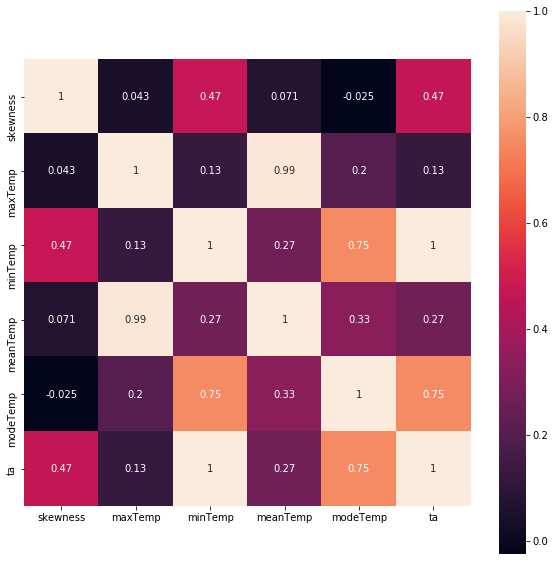

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

featuresCorr = features.corr()
fig = plt.figure(figsize=(10, 10))
# plt.subplots((1,1,1)) # 设置画面大小
sns.heatmap(featuresCorr, annot=True, vmax=1, square=True)
plt.show()

In [11]:
features = features.drop(["maxTemp", "minTemp"], axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
features_scaler = std.fit_transform(features)

In [13]:
target_column = target_column.iloc[features.index]

# 使用LOF算法开始检测异常

In [57]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=40, contamination=0.05)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df_face)
# n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [58]:
X_scores.argmin()

88

# 作图看看检测出的异常是什么样子的

## n_neighbors=20

In [43]:
min_index = np.argpartition(X_scores, 40)[:40]

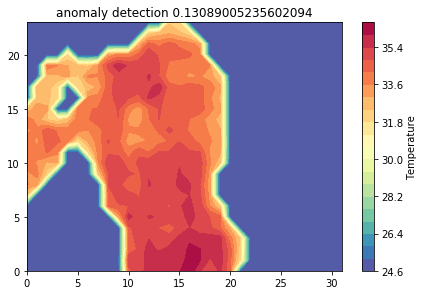

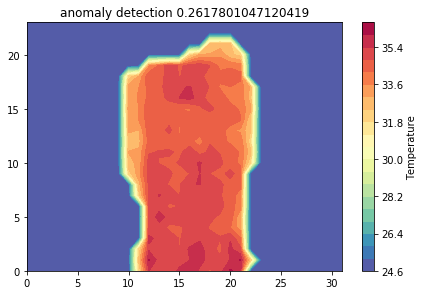

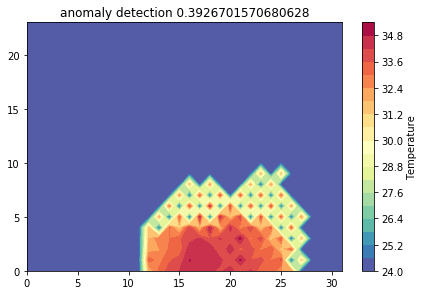

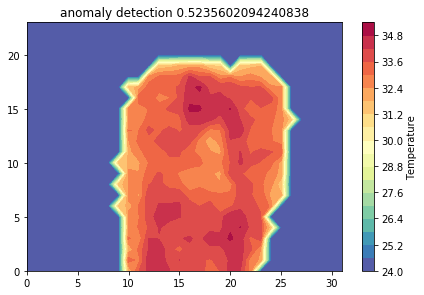

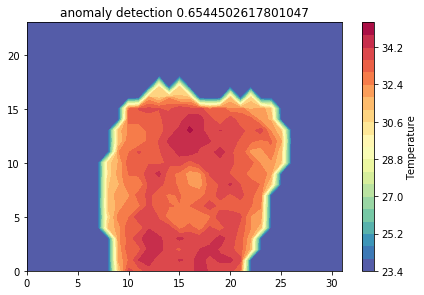

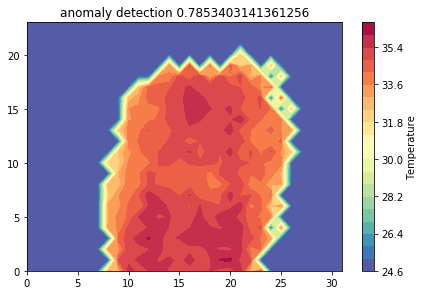

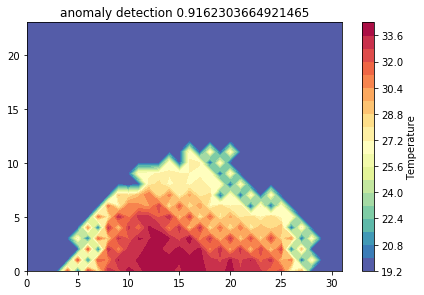

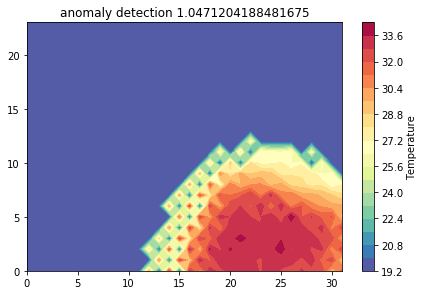

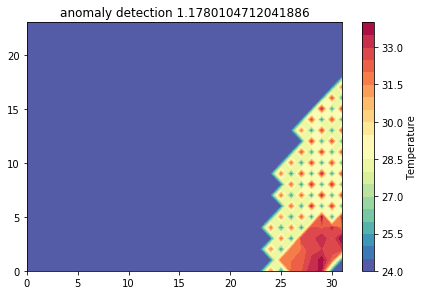

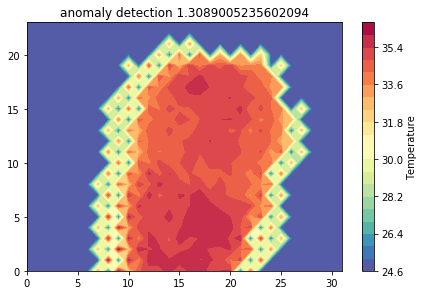

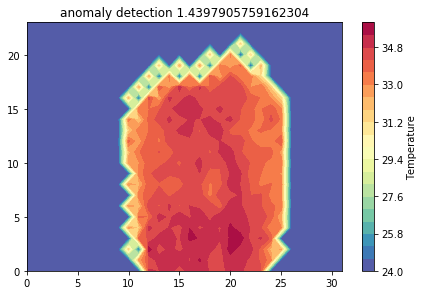

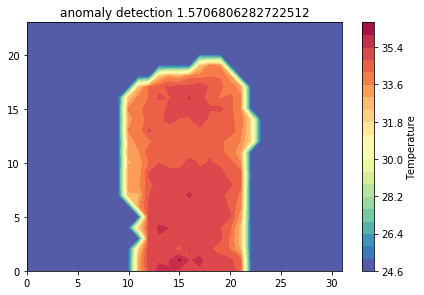

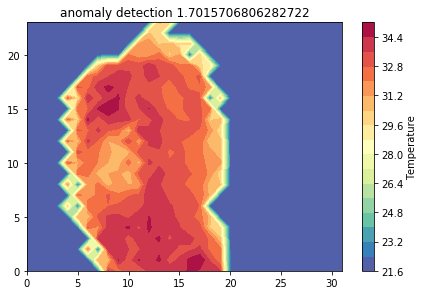

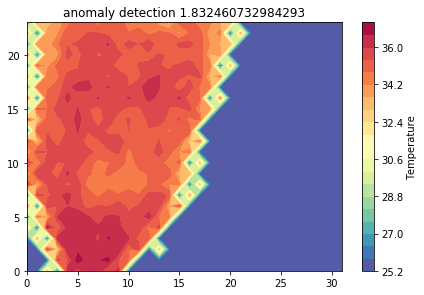

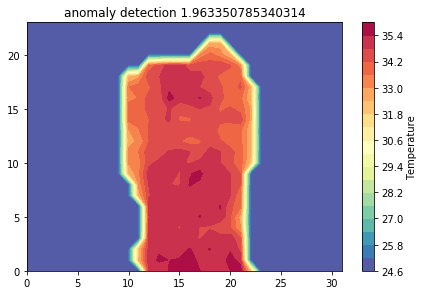

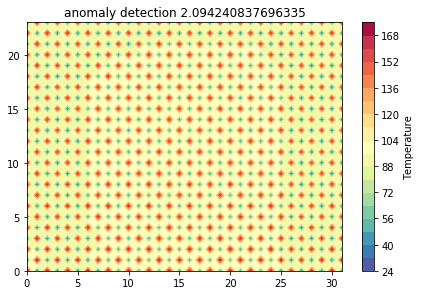

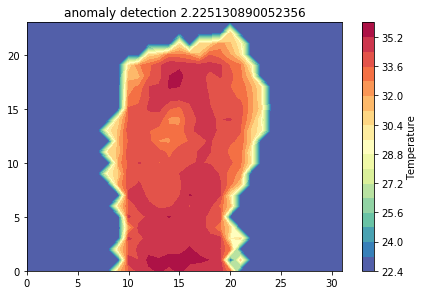

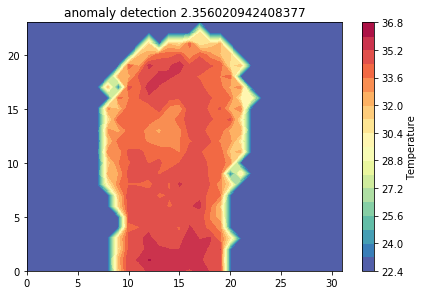

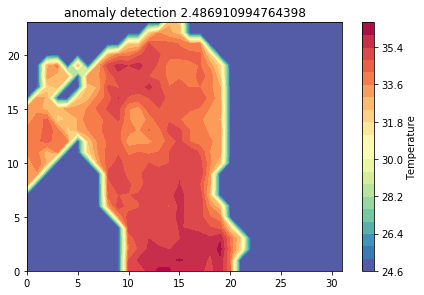

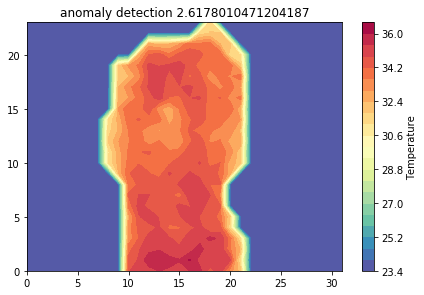

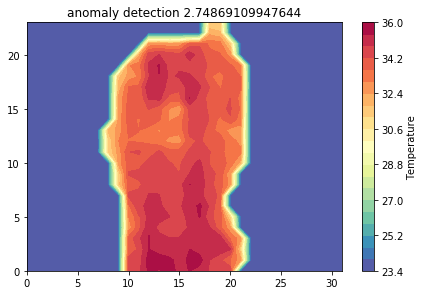

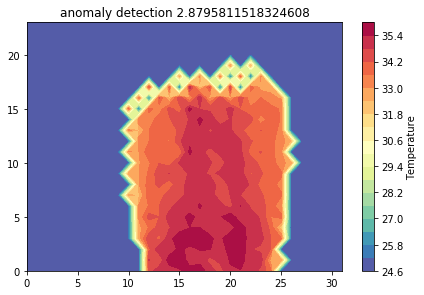

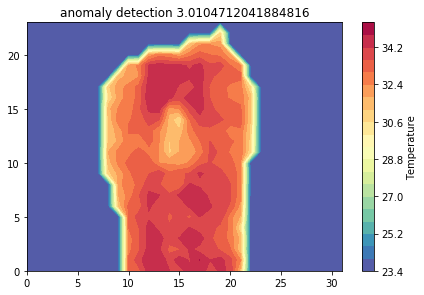

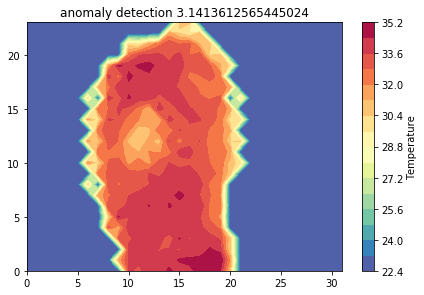

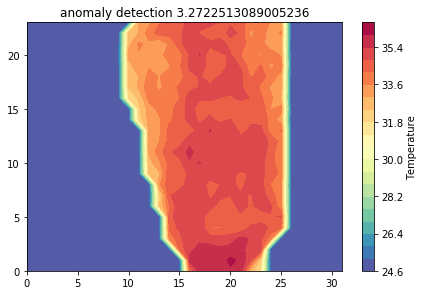

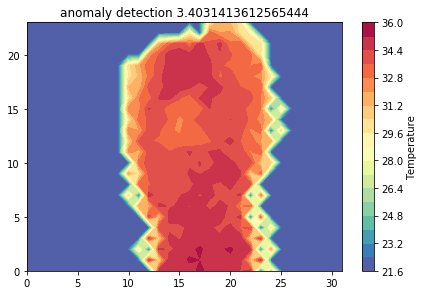

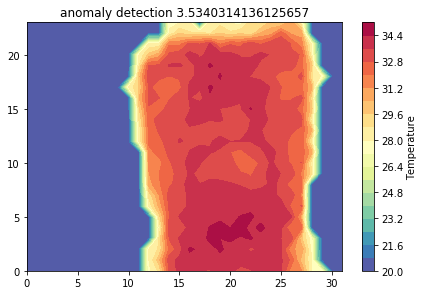

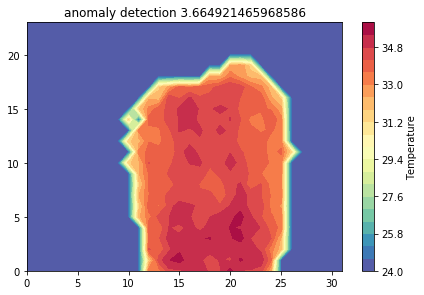

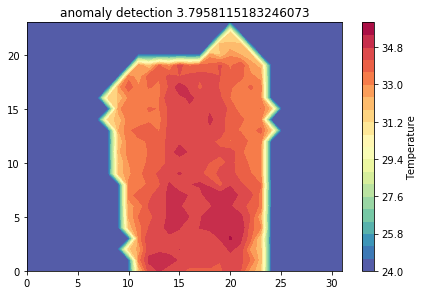

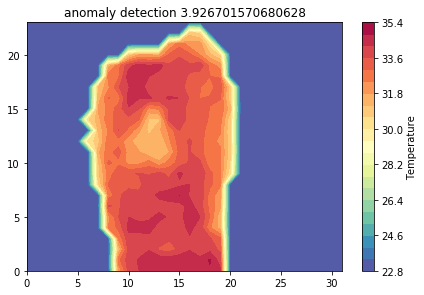

In [47]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
no = 0
for i in min_index:
    no += 1
    temperature = df_face.iloc[i]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1

    fig = plt.figure(figsize=(24, 32))
    fig.add_subplot(6, 3, 1)
    c = plt.contourf(X, Y, temperature0, cmap='Spectral_r', levels=20)
    #     plt.contour(X, Y, temperature0, colors='black', linewidth=.001, levels=15)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('anomaly detection {}'.format(no/X_scores.shape[0]*100))
    plt.show()

## n_neighbors=40

In [50]:
min_index = np.argpartition(X_scores, 40)[:40]

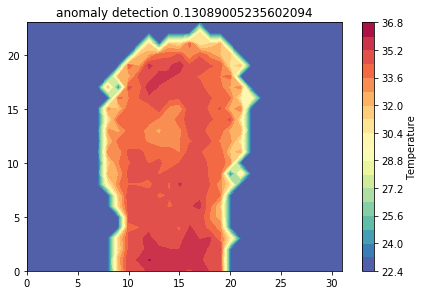

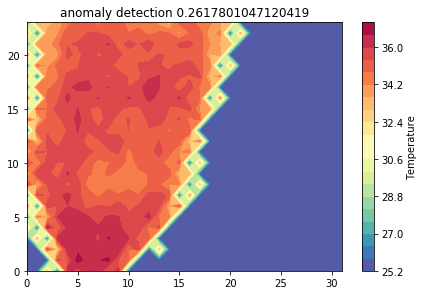

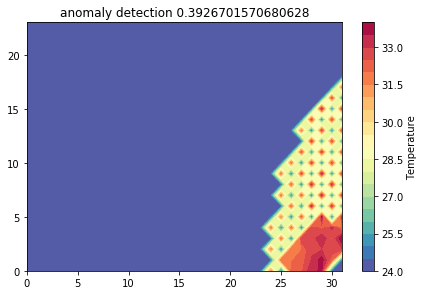

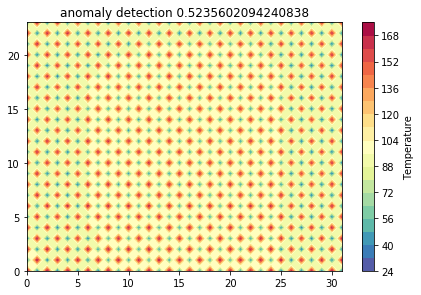

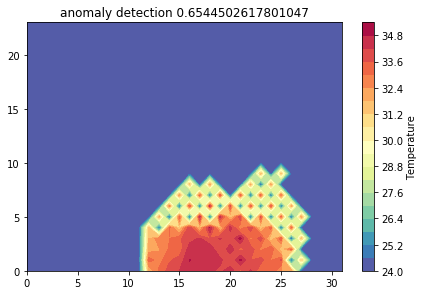

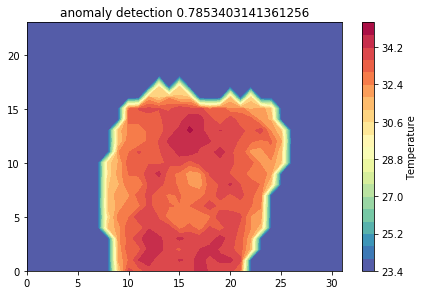

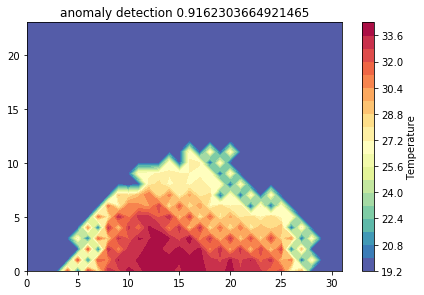

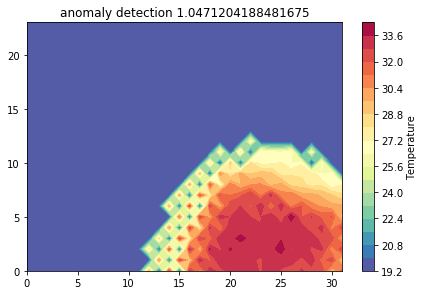

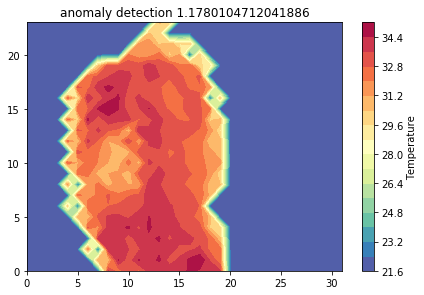

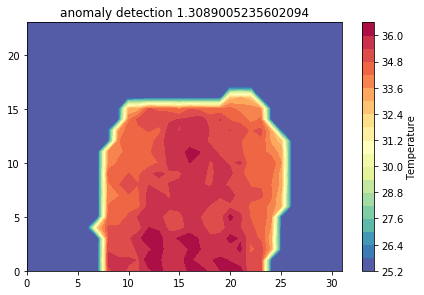

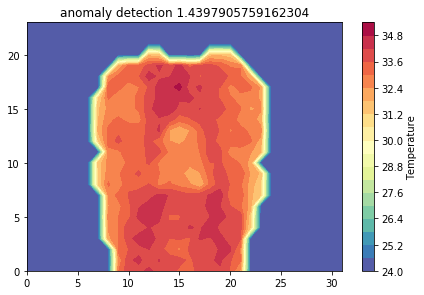

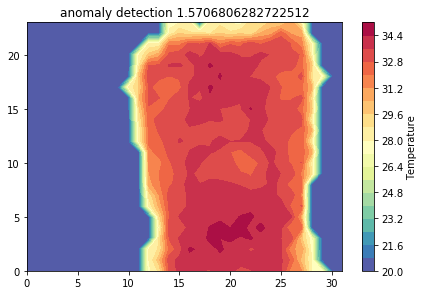

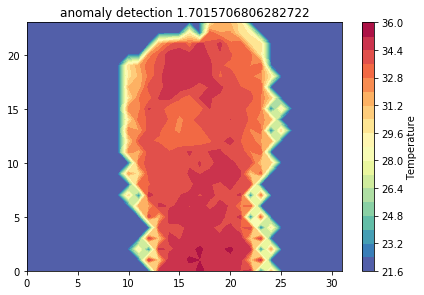

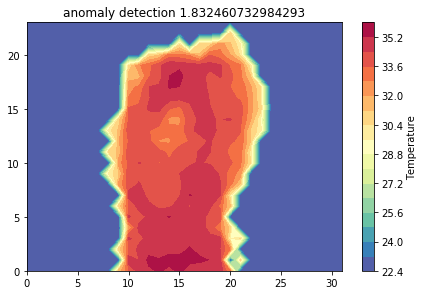

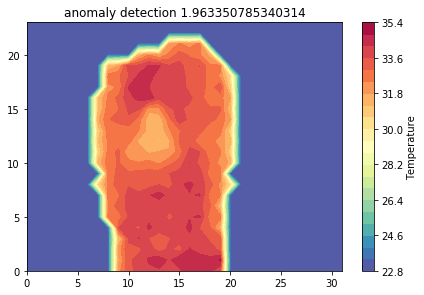

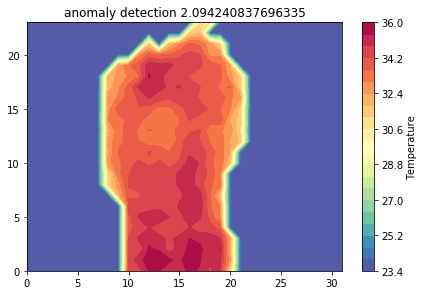

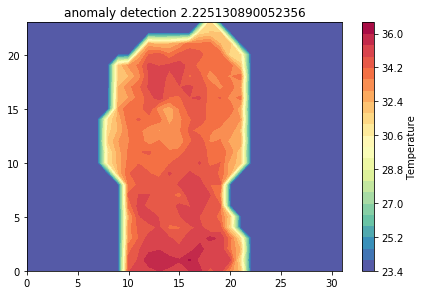

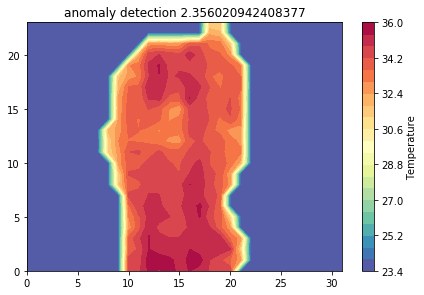

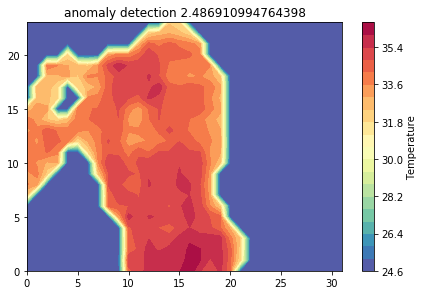

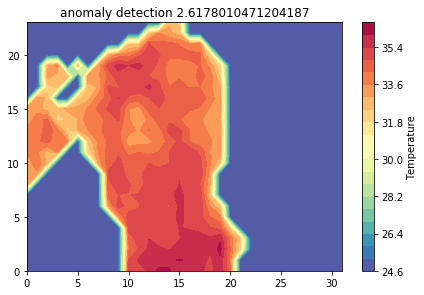

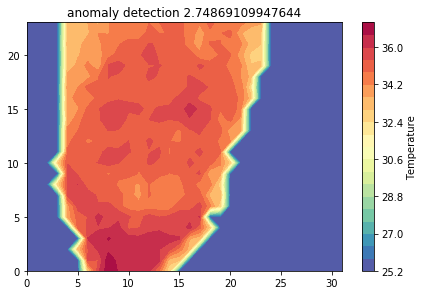

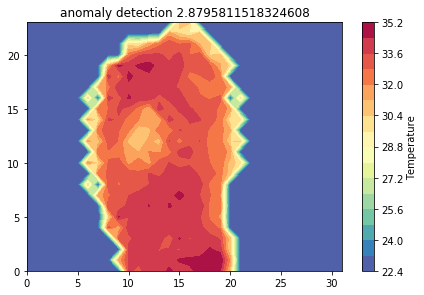

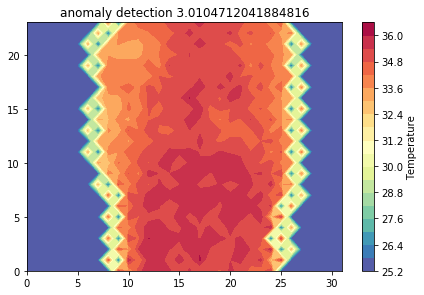

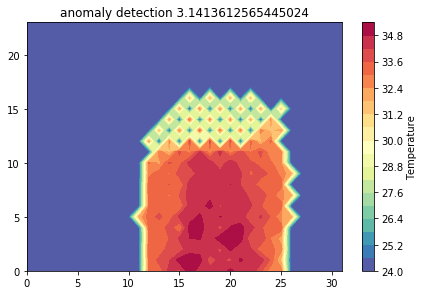

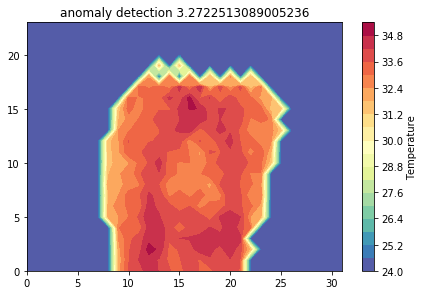

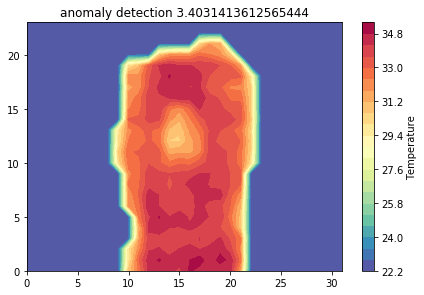

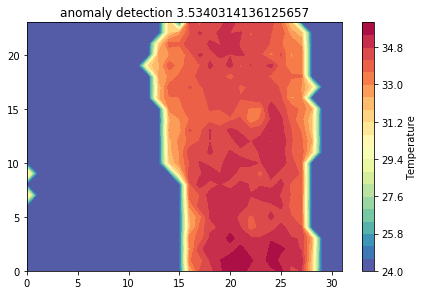

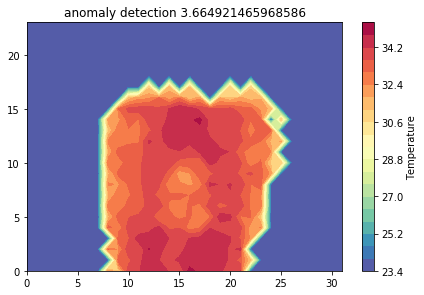

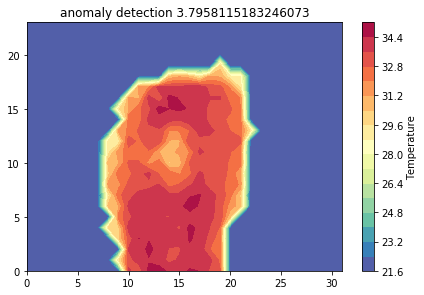

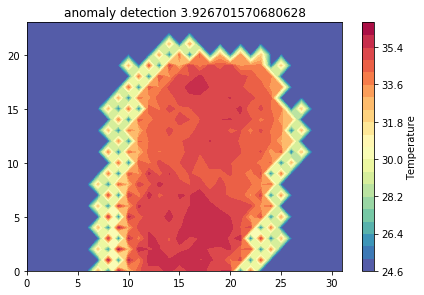

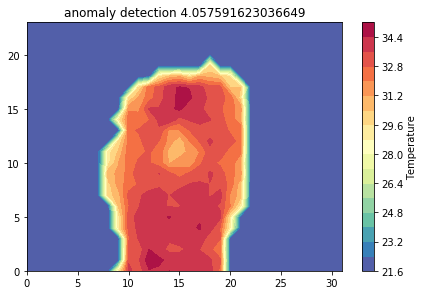

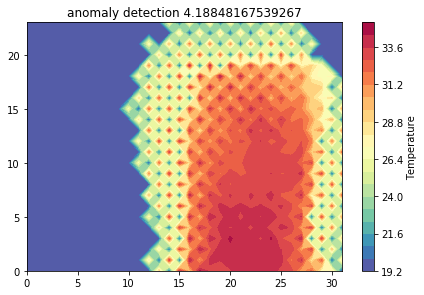

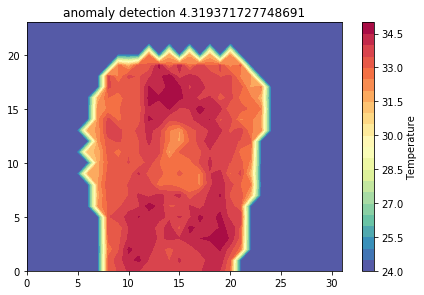

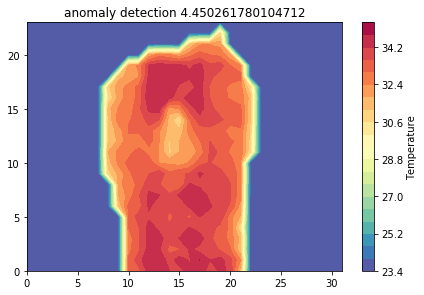

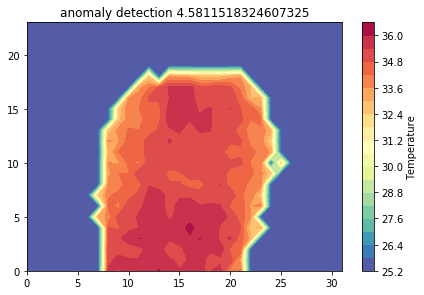

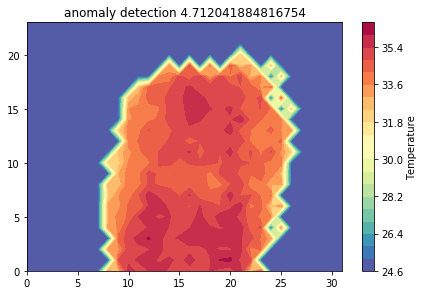

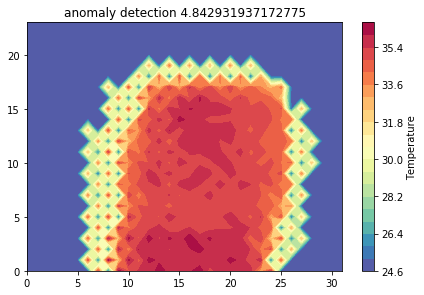

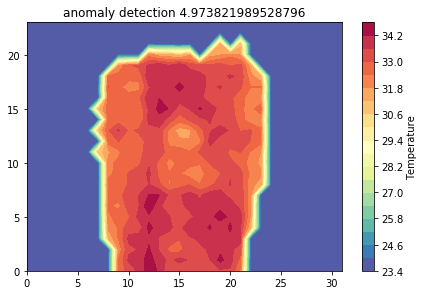

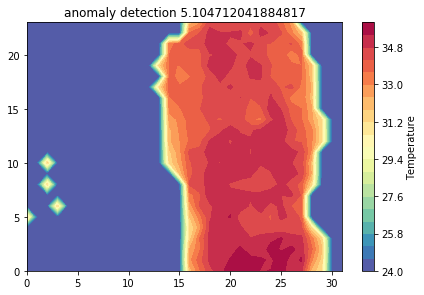

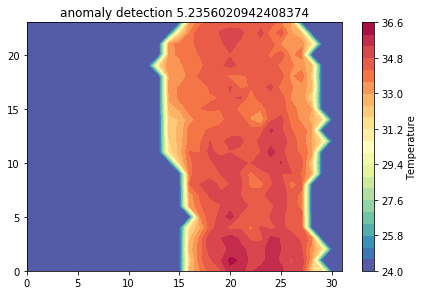

In [51]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
no = 0
for i in min_index:
    no += 1
    temperature = df_face.iloc[i]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1

    fig = plt.figure(figsize=(24, 32))
    fig.add_subplot(6, 3, 1)
    c = plt.contourf(X, Y, temperature0, cmap='Spectral_r', levels=20)
    #     plt.contour(X, Y, temperature0, colors='black', linewidth=.001, levels=15)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('anomaly detection {}'.format(no/X_scores.shape[0]*100))
    plt.show()

结果发现n_neighbor提高之后，更快检测到异常的图片

## n_neighbors=60

In [61]:
min_index = np.argpartition(X_scores, 100)[:100]

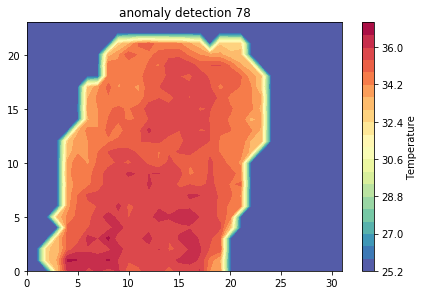

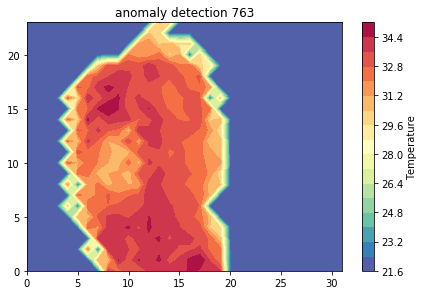

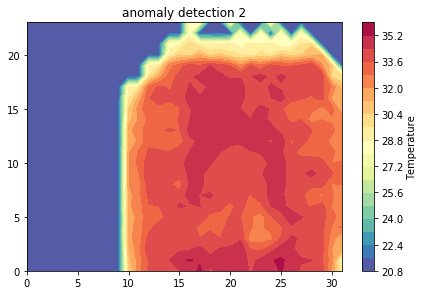

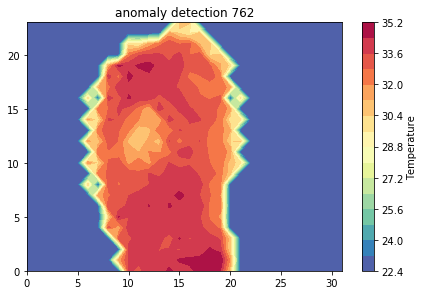

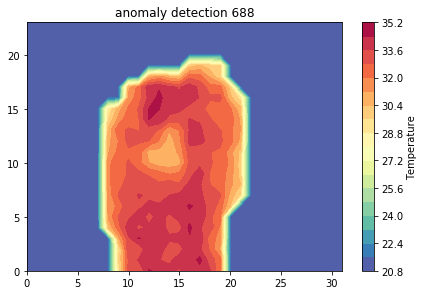

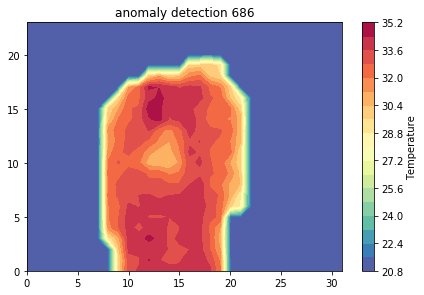

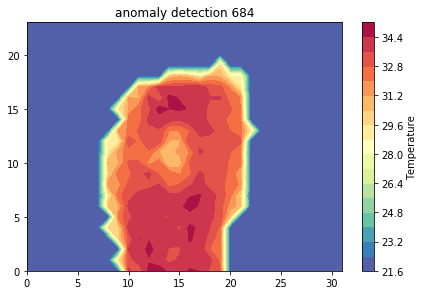

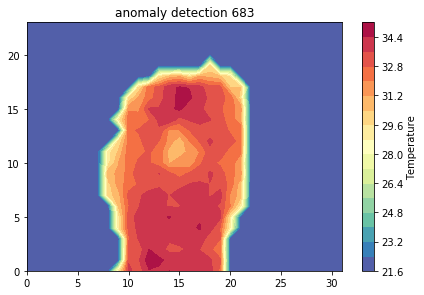

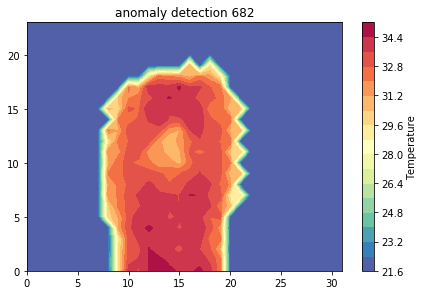

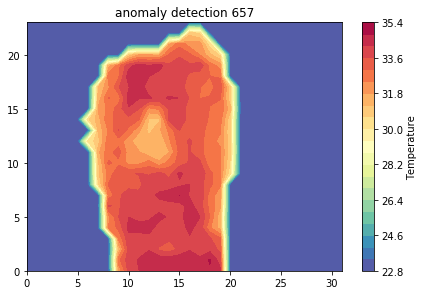

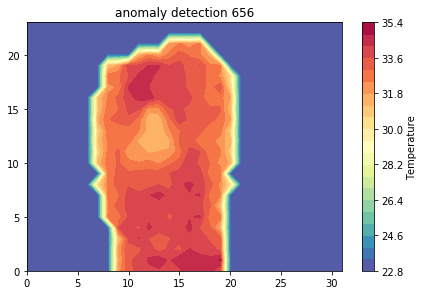

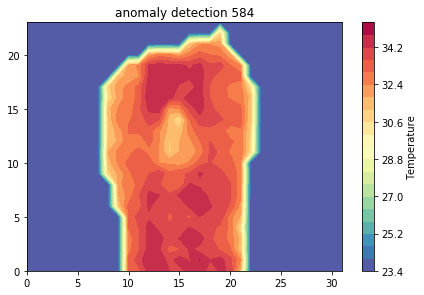

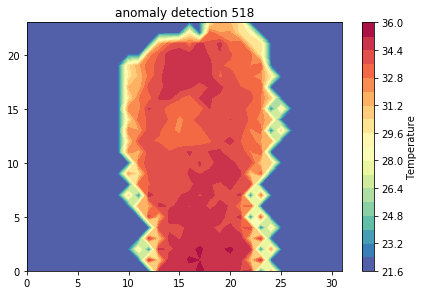

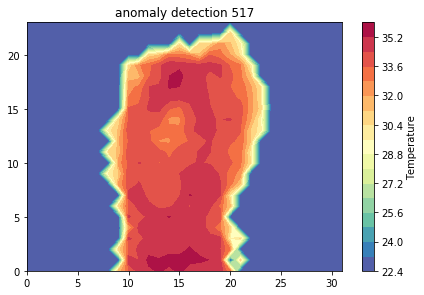

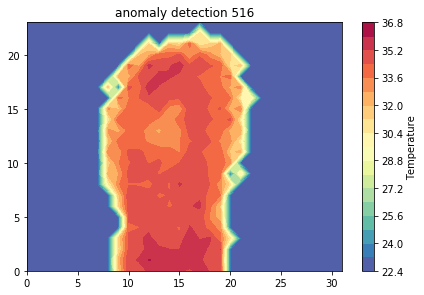

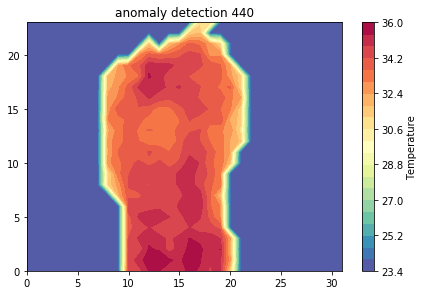

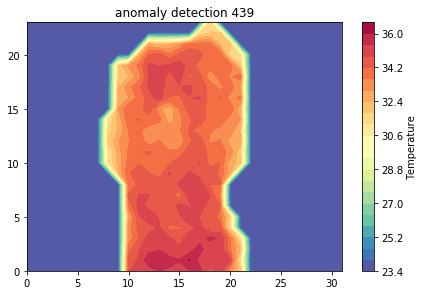

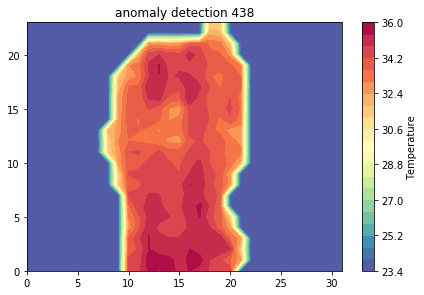

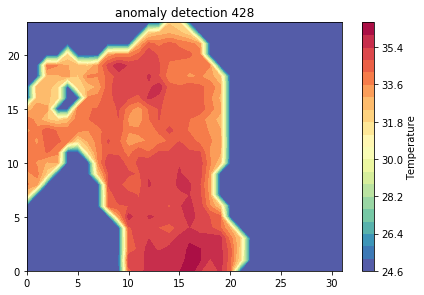

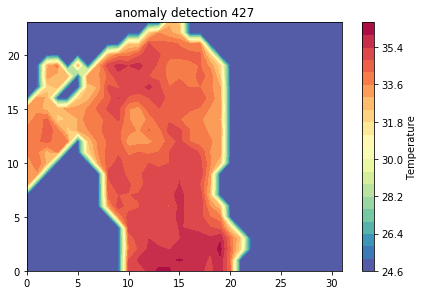

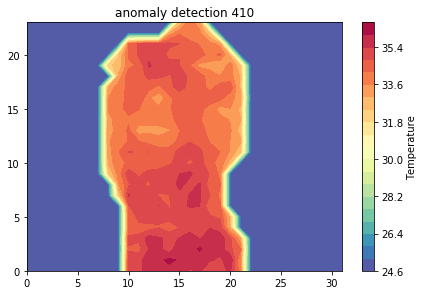

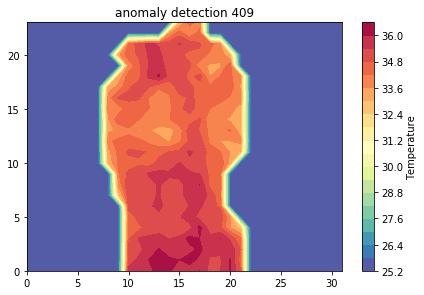

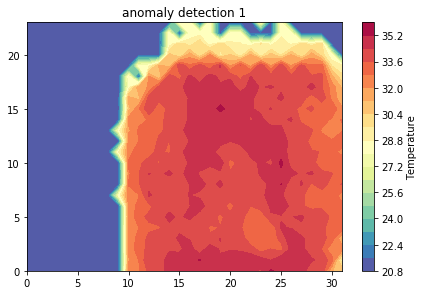

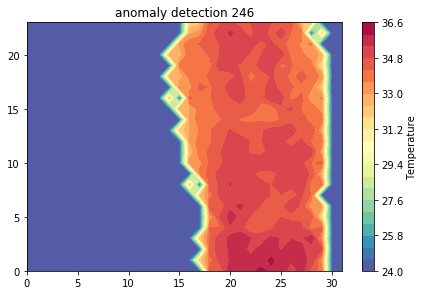

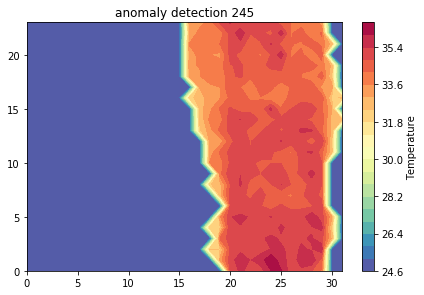

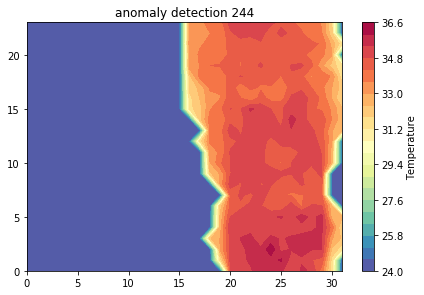

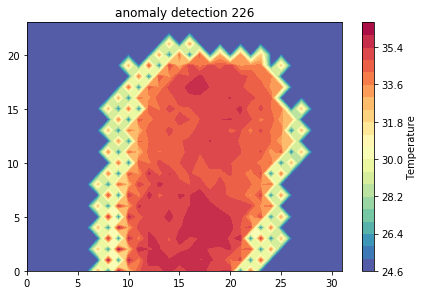

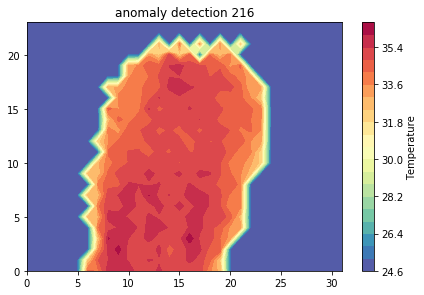

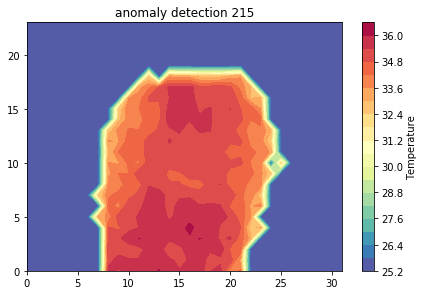

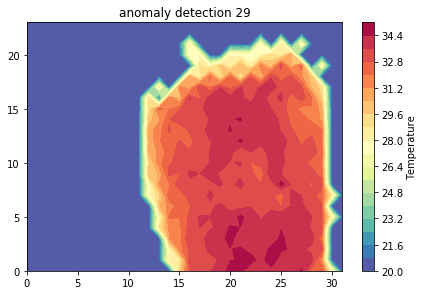

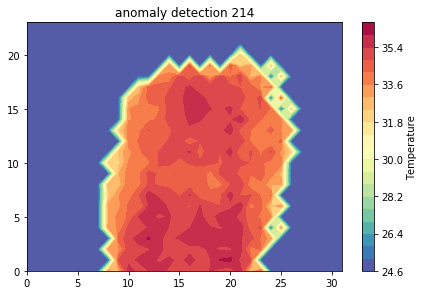

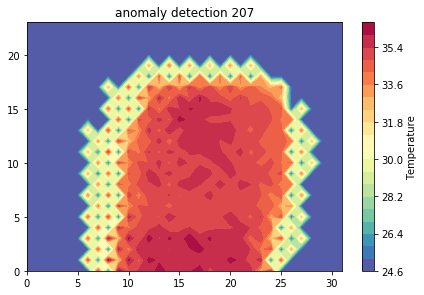

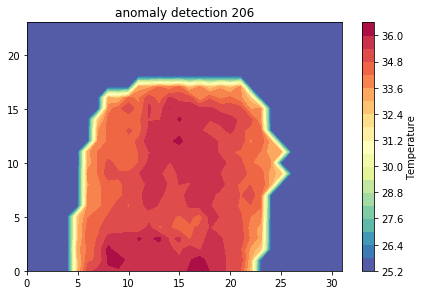

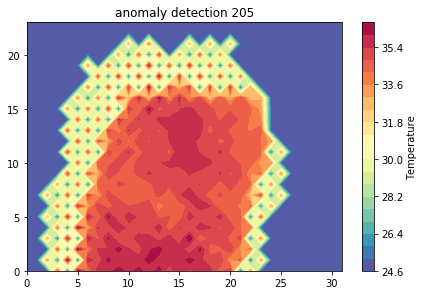

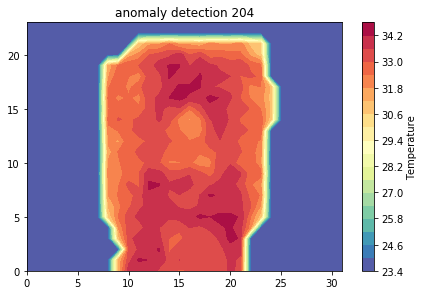

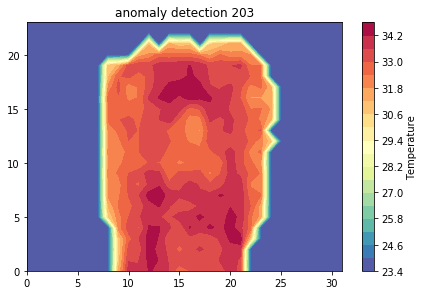

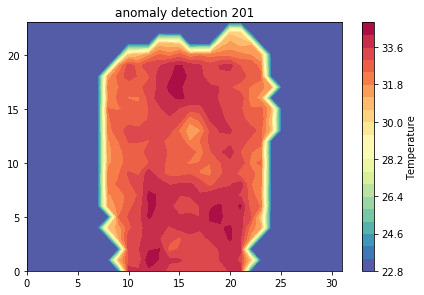

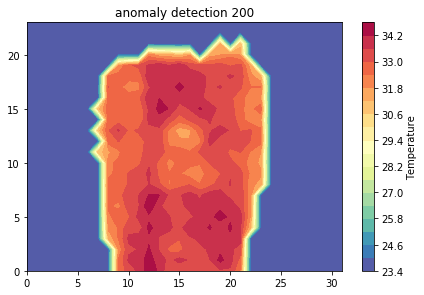

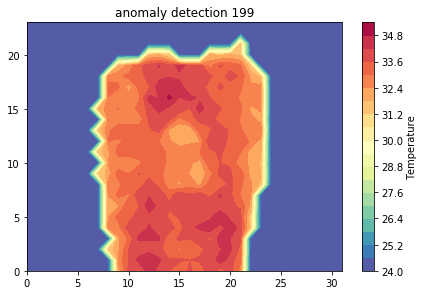

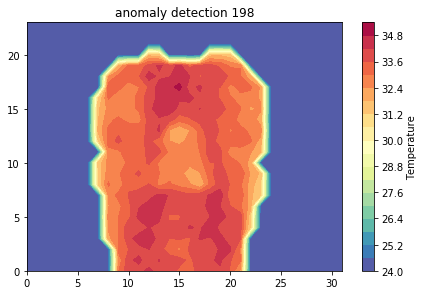

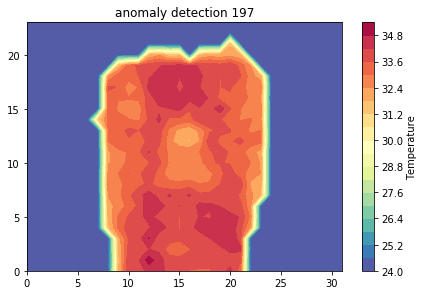

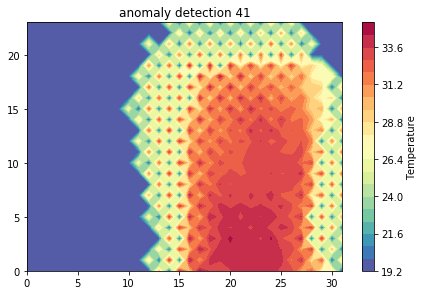

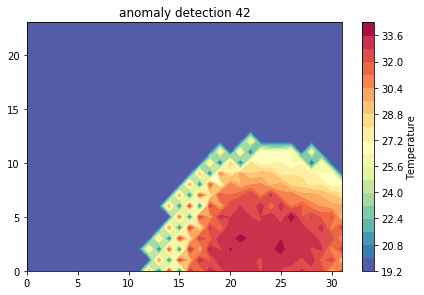

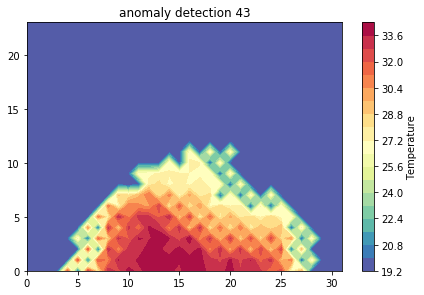

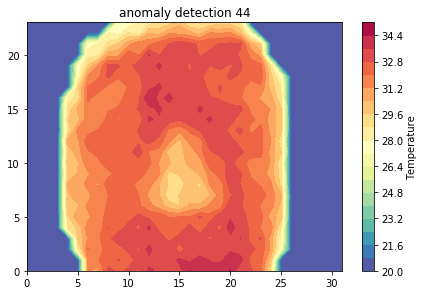

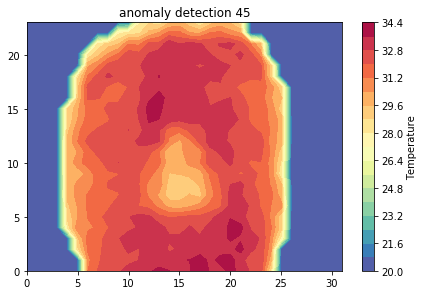

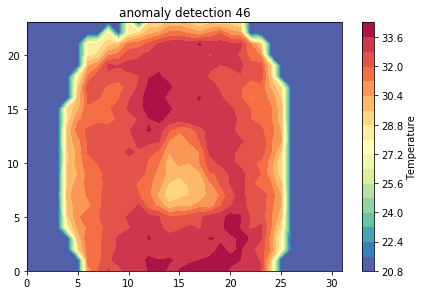

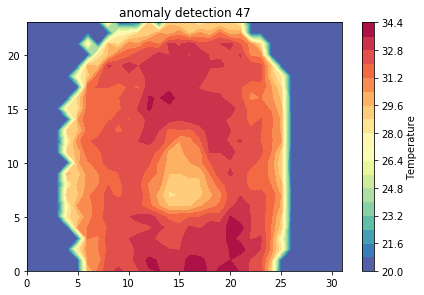

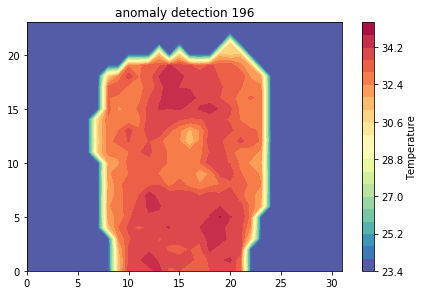

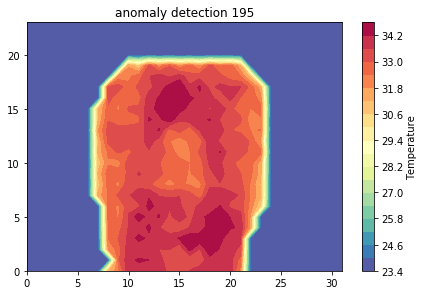

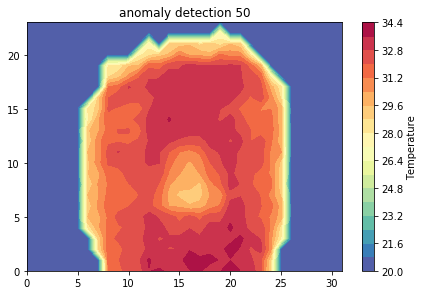

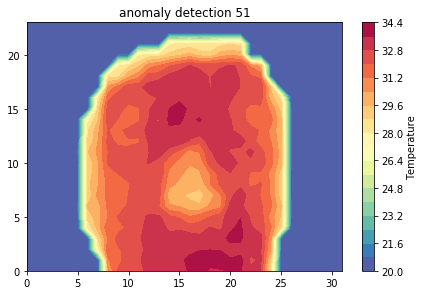

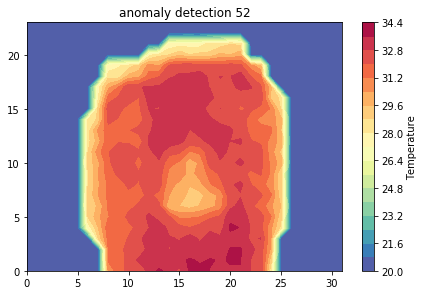

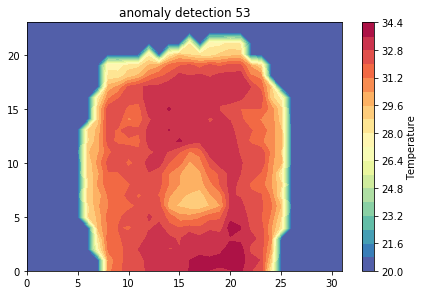

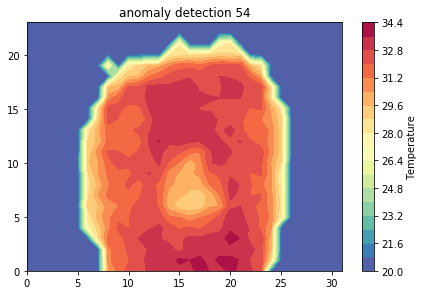

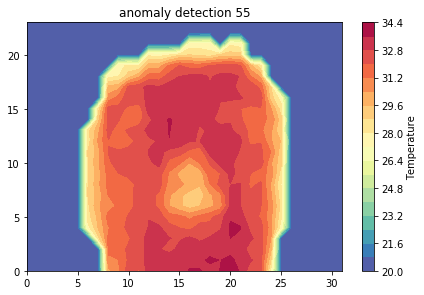

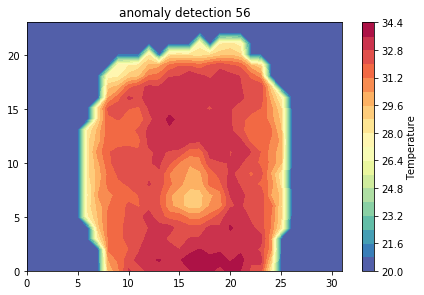

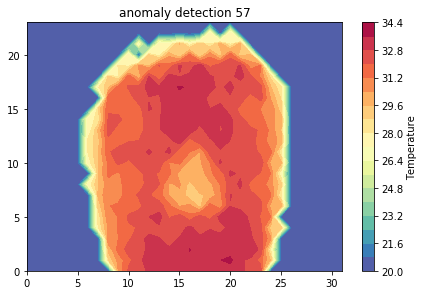

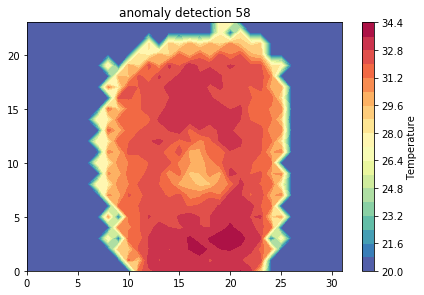

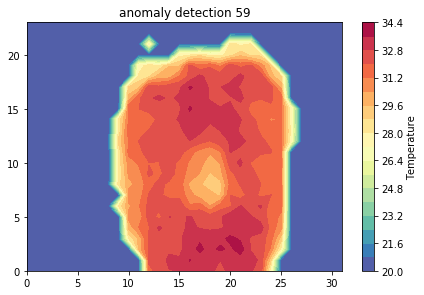

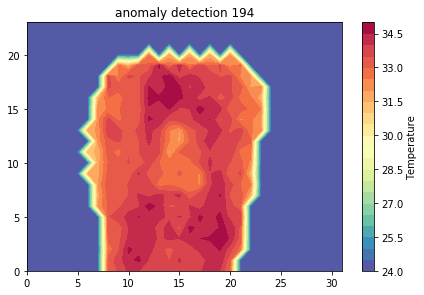

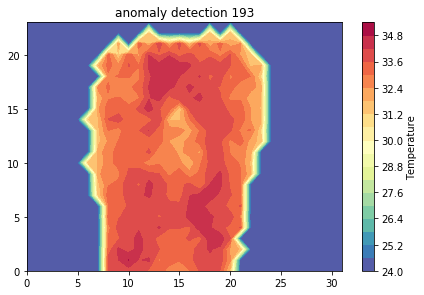

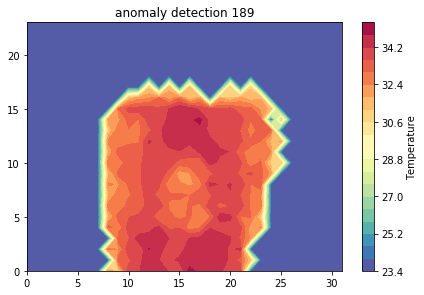

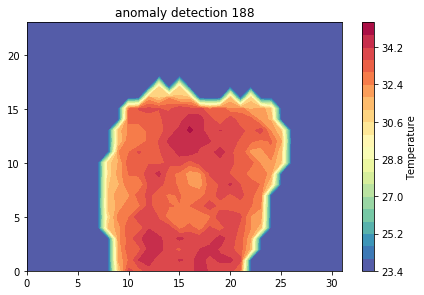

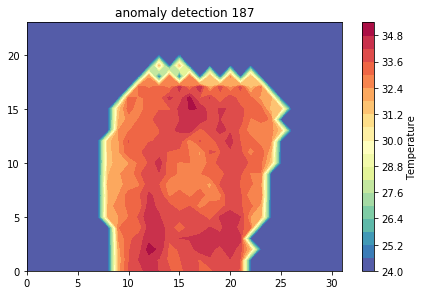

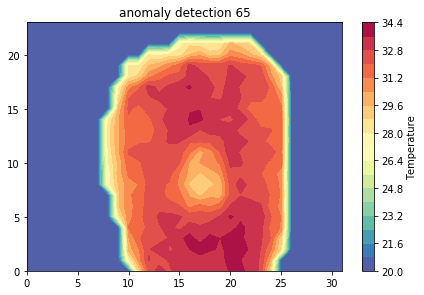

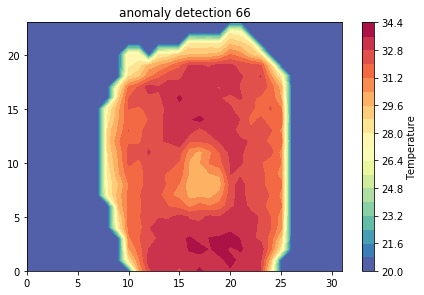

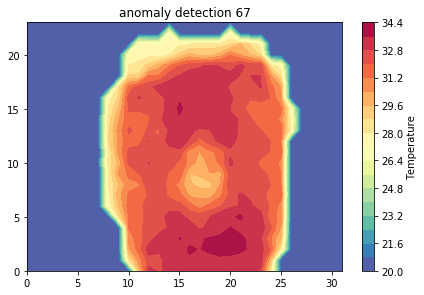

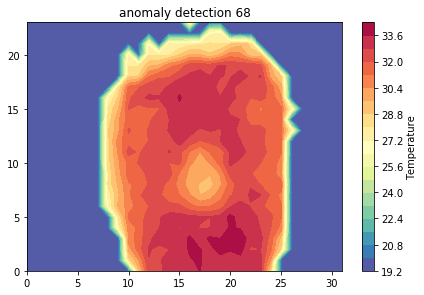

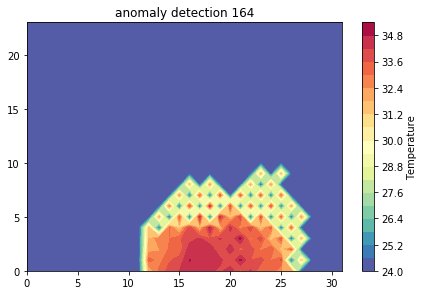

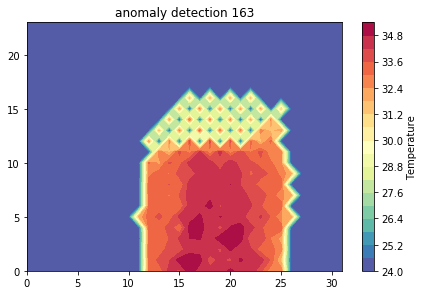

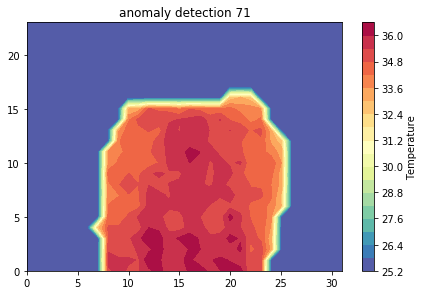

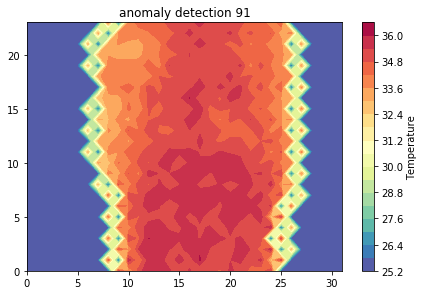

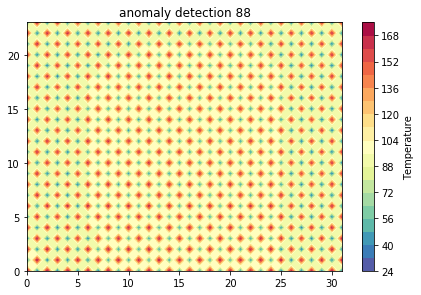

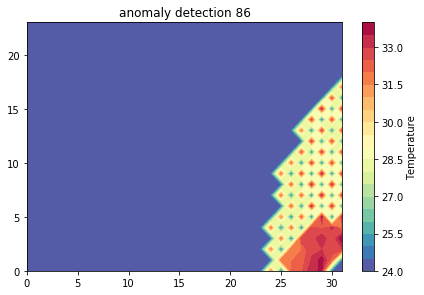

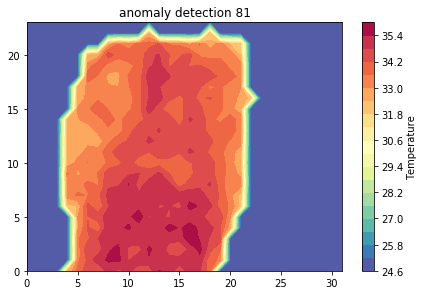

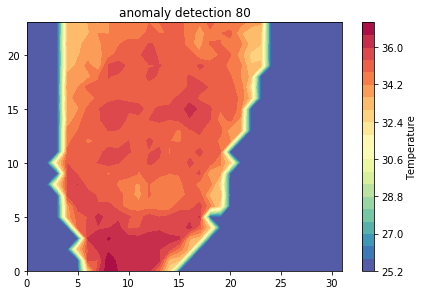

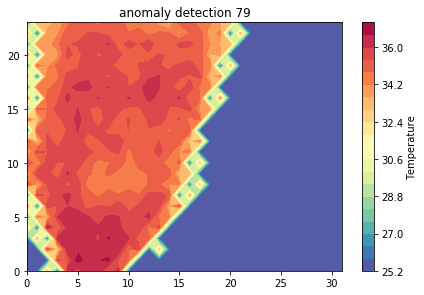

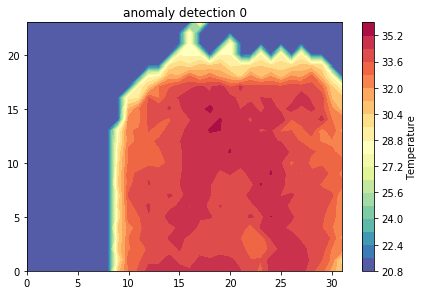

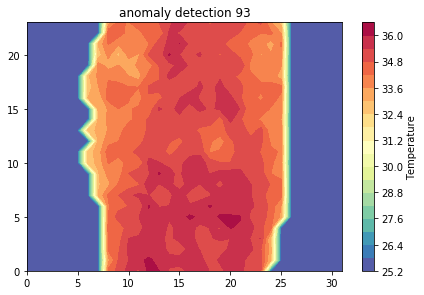

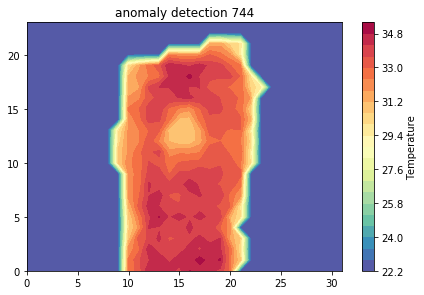

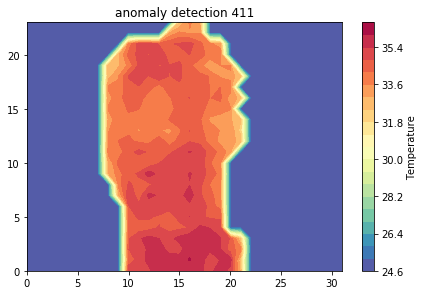

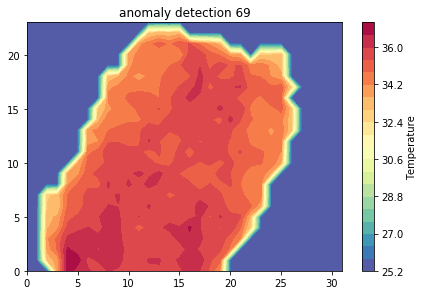

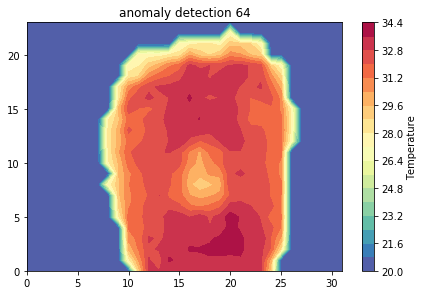

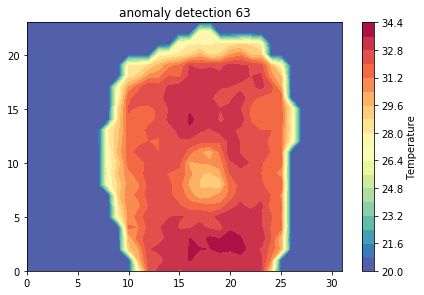

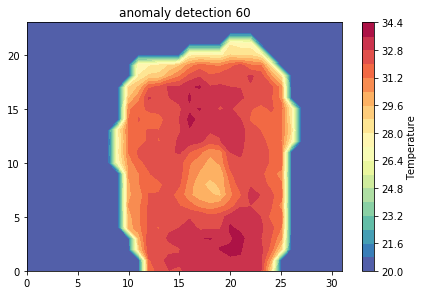

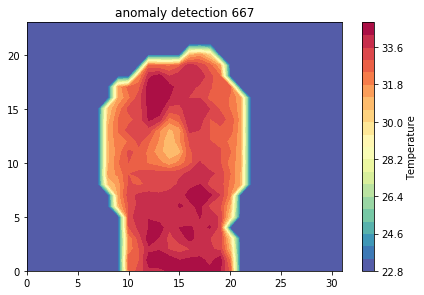

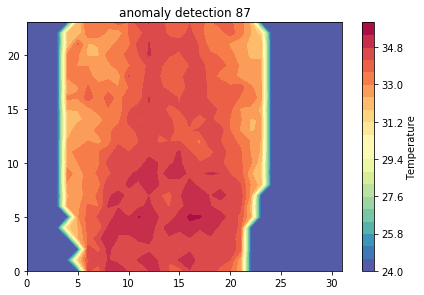

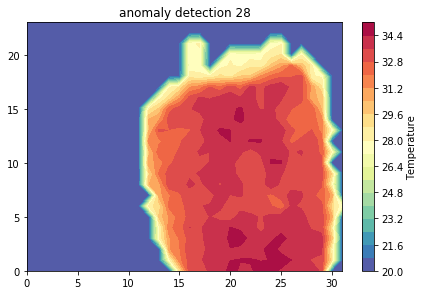

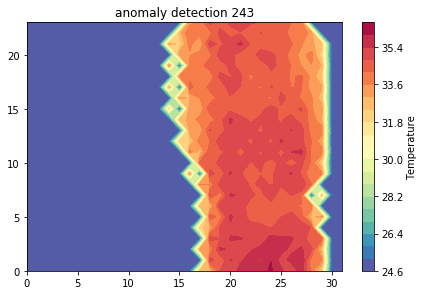

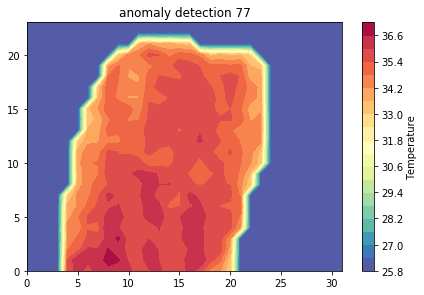

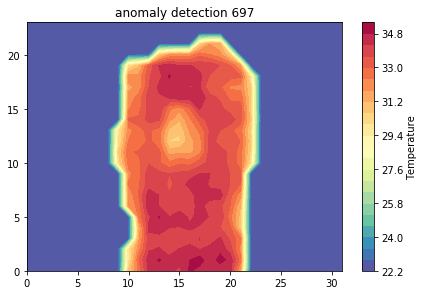

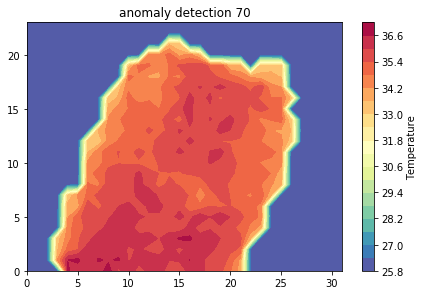

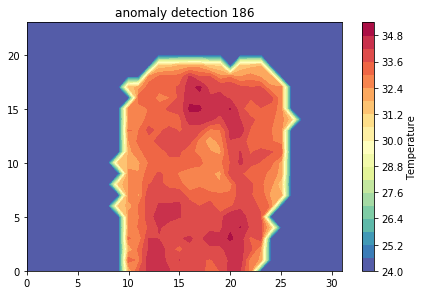

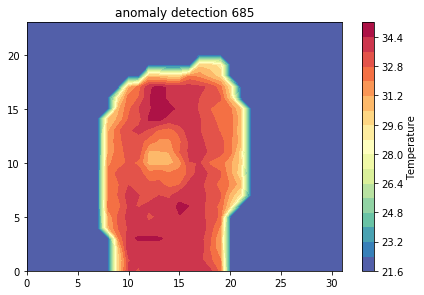

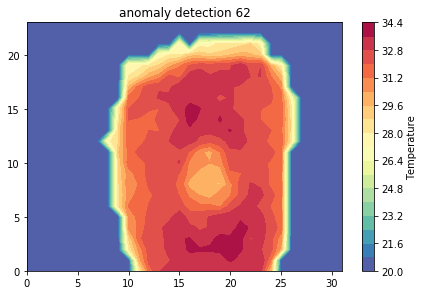

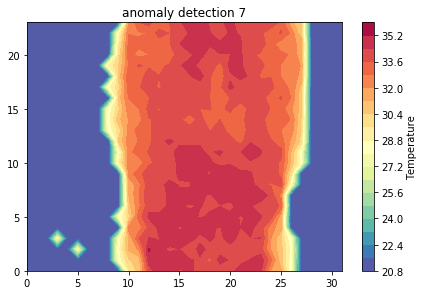

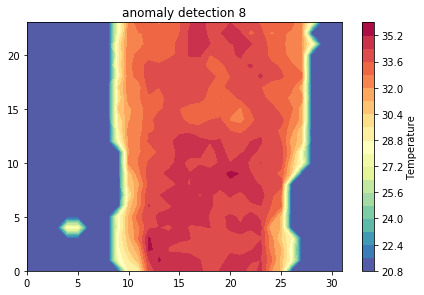

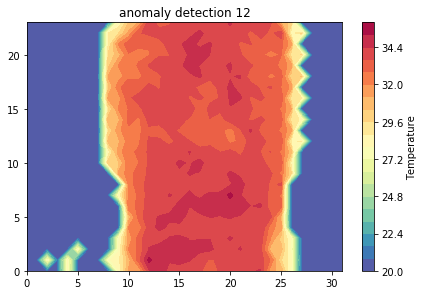

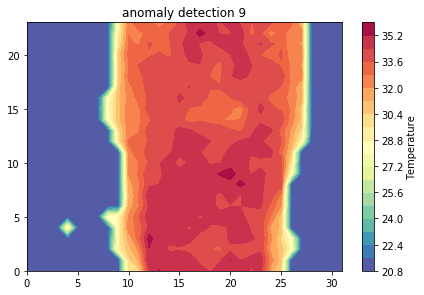

In [62]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
no = 0
for l in min_index:
# 注意不能一个多个循环同时用一个值i 
    no += 1
    temperature = df_face.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1

    fig = plt.figure(figsize=(24, 32))
    fig.add_subplot(6, 3, 1)
    c = plt.contourf(X, Y, temperature0, cmap='Spectral_r', levels=20)
    #     plt.contour(X, Y, temperature0, colors='black', linewidth=.001, levels=15)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('anomaly detection {}'.format(l))
    plt.show()


这些是异常的样本：86, 88, 164, 163, 43, 42, 41, 226
看看怎么调n_neighbor和contamination能让这些样本更快地被找出来。

# 自动调参 确定最佳参数

In [55]:
min_sum_index = 700
for i in range(16, 64, 4):
    for j in np.arange(0.05, 0.3, 0.05):
        # fit the model for outlier detection (default)
        clf = LocalOutlierFactor(n_neighbors=i, contamination=j)
        # use fit_predict to compute the predicted labels of the training samples
        # (when LOF is used for outlier detection, the estimator has no predict,
        # decision_function and score_samples methods).
        y_pred = clf.fit_predict(df_face)
        # n_errors = (y_pred != ground_truth).sum()
        X_scores = clf.negative_outlier_factor_

        X_scores.argmin()

        min_index = np.argsort(X_scores)
        # 把值从小排到达，返回index，也就是df中的位置
        sum_index = np.where(min_index==86)[0] + np.where(min_index==88)[0] + np.where(min_index==164)[0] + np.where(min_index==163)[0] + np.where(min_index==43)[0] + \
        np.where(min_index==42)[0] + np.where(min_index==41)[0] + np.where(min_index==226)[0]
        # 找这些位置，它们在min_index里的位置尽可能考前，sum_index尽可能小
        if sum_index < min_sum_index:
            min_sum_index = sum_index
            min_i = i
            min_j = j
        
        if i % 5 == 0:
            print(i)

20
20
20
20
20
40
40
40
40
40
60
60
60
60
60


In [56]:
print(min_i, min_j)

40 0.05


调参过后看一下结果

In [14]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=40, contamination=0.05)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df_face)
# n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [15]:
X_scores.argmin()

88

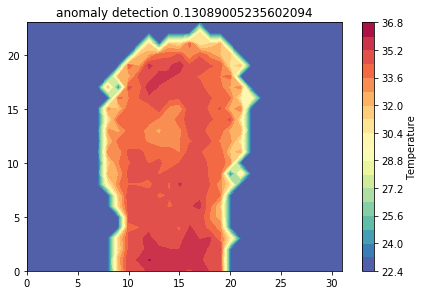

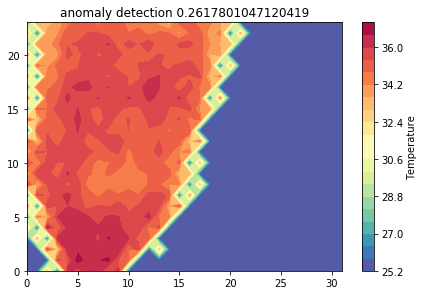

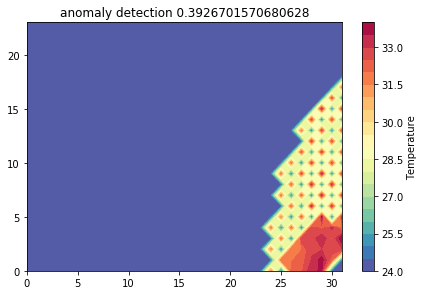

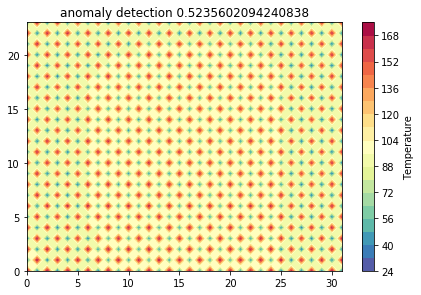

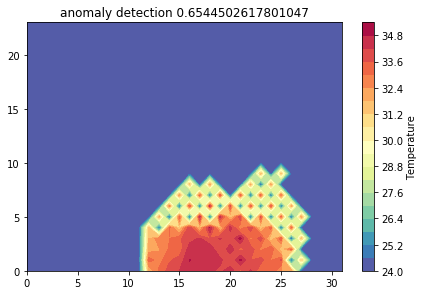

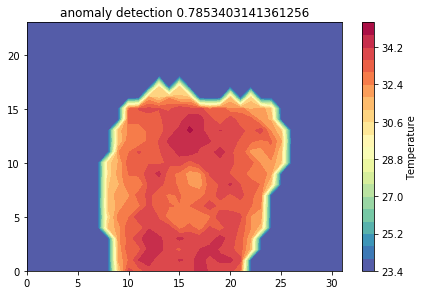

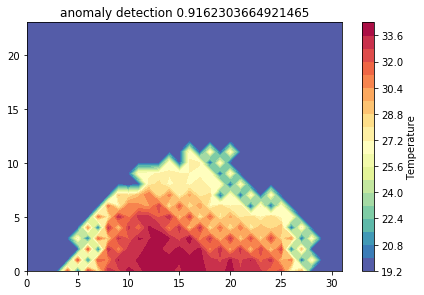

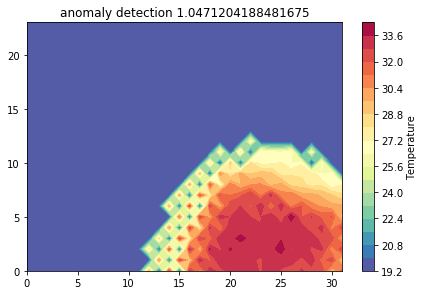

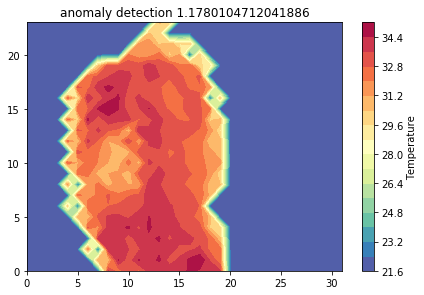

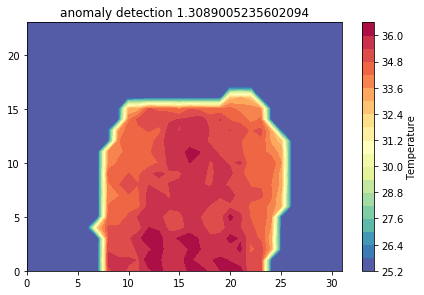

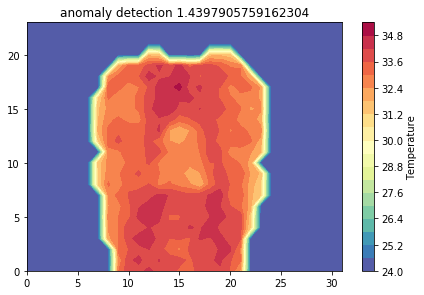

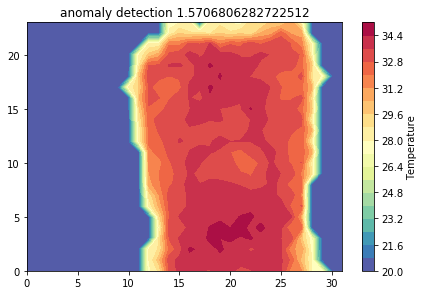

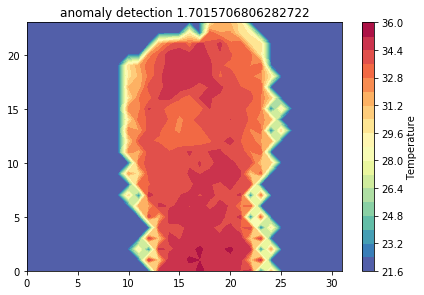

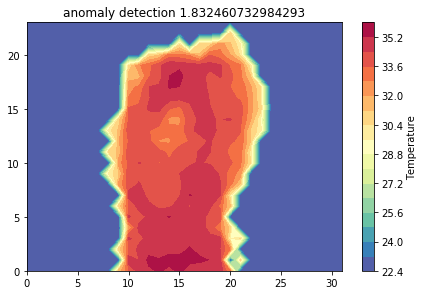

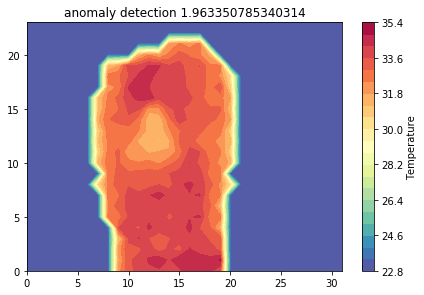

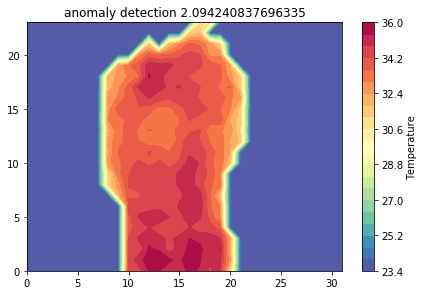

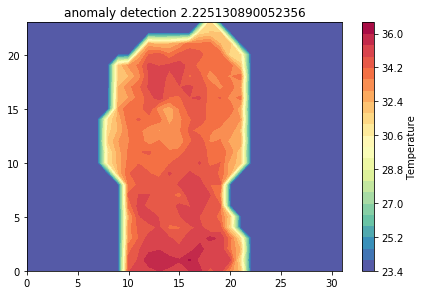

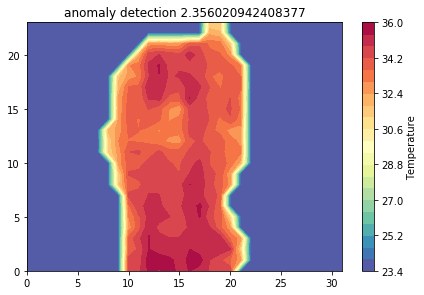

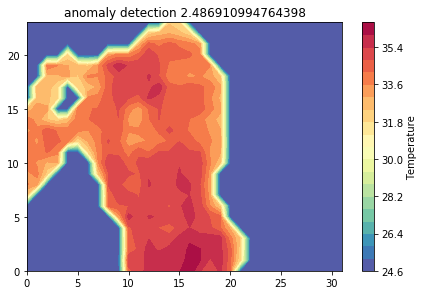

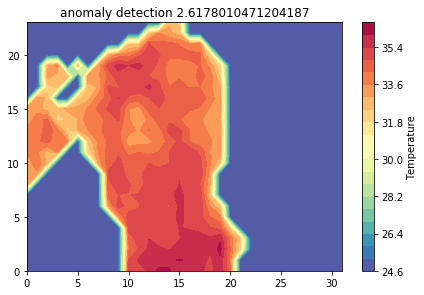

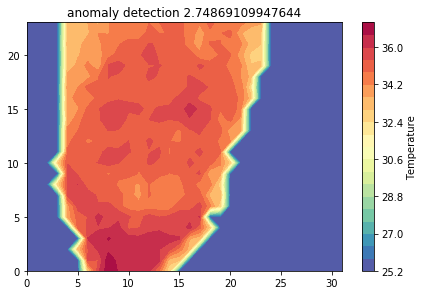

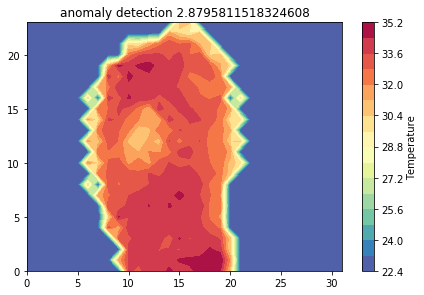

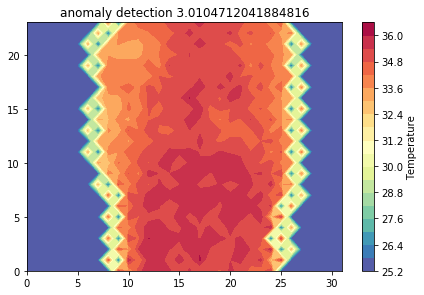

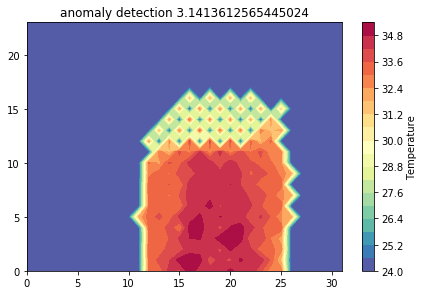

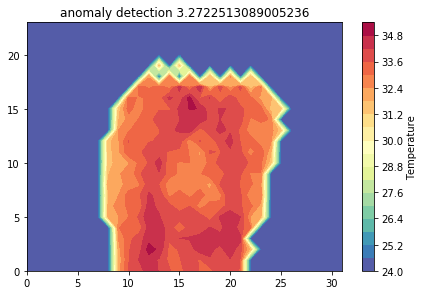

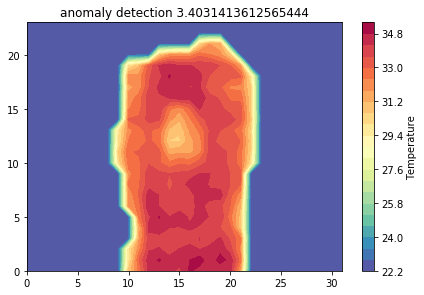

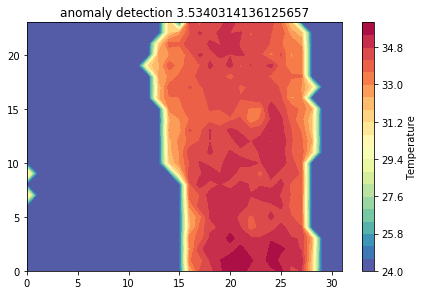

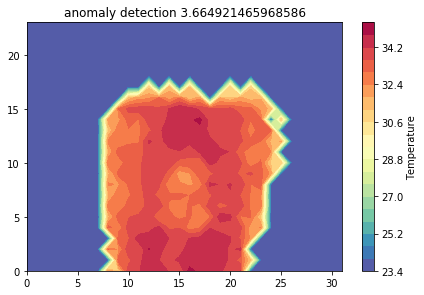

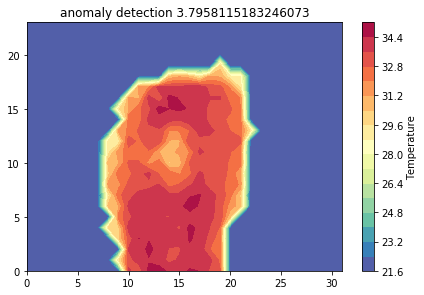

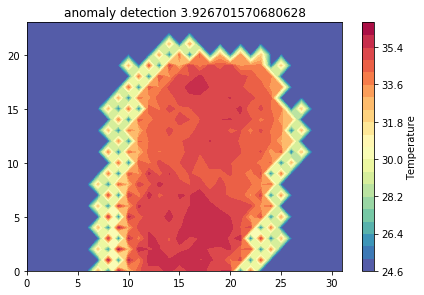

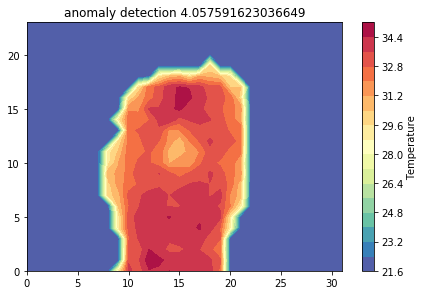

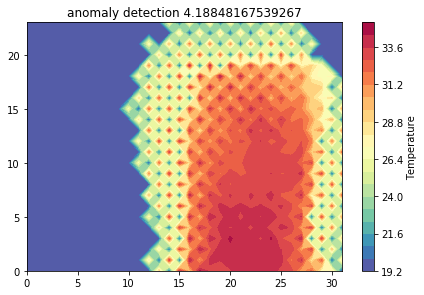

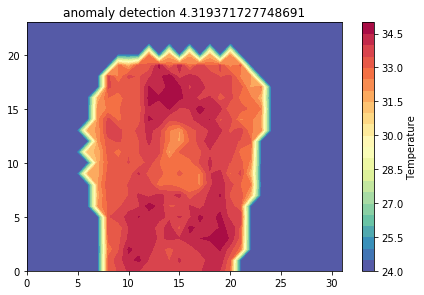

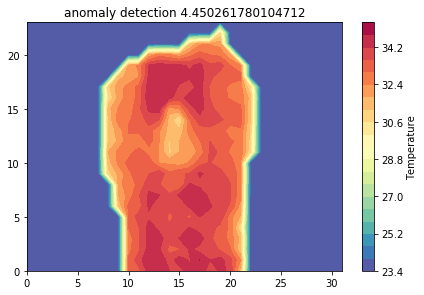

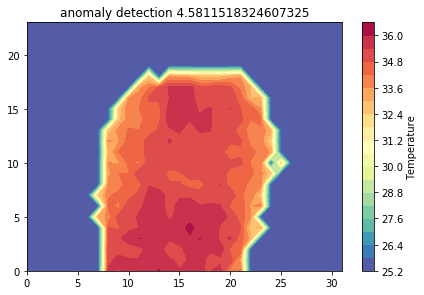

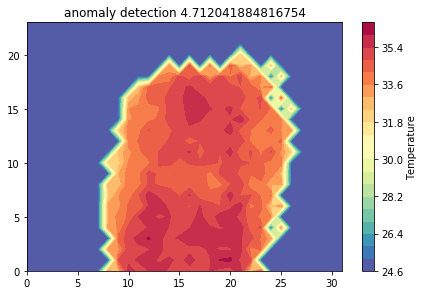

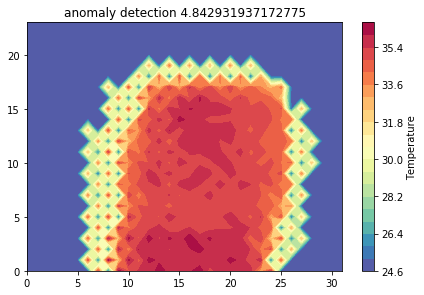

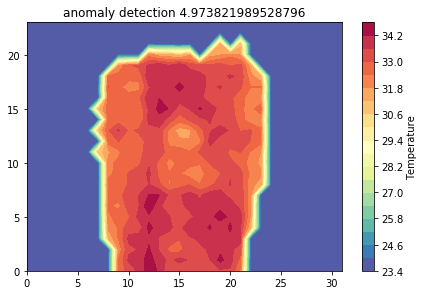

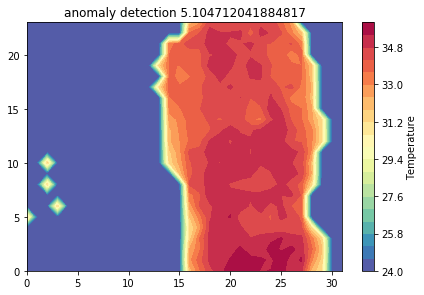

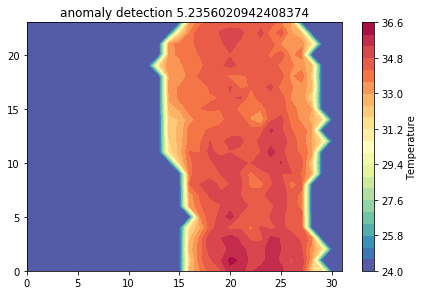

In [16]:
min_index = np.argpartition(X_scores, 40)[:40]

# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
no = 0
for i in min_index:
    no += 1
    temperature = df_face.iloc[i]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1

    fig = plt.figure(figsize=(24, 32))
    fig.add_subplot(6, 3, 1)
    c = plt.contourf(X, Y, temperature0, cmap='Spectral_r', levels=20)
    #     plt.contour(X, Y, temperature0, colors='black', linewidth=.001, levels=15)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('anomaly detection {}'.format(no/X_scores.shape[0]*100))
    plt.show()